# Introduction
Calculates the pitch class profile of a given piece, writes it to a CSV file, graphs the ranges of each piece on a bar graph, graphs EMA, calculates anomalous values (according to Tukey's Rule).

### Imports & Setup

In [1]:
from music21 import *
import os
import csv
import itertools as it
from collections import Counter
from operator import itemgetter
from collections import OrderedDict
import statistics
import numpy as np
import orca
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import statsmodels
import plotly.express as px
from IPython.display import Image

In [2]:
csvOut=open("/Users/joshua ballance/Desktop/pitchclassprofile.csv", "w") #open csv file, n.b. this is overwriting the file
titleWriter = csv.writer(csvOut, delimiter=',', quotechar='|')
csvOut.close()

In [2]:
properCorpus = corpus.corpora.LocalCorpus('DPhilCorpus')
properCorpus.existsInSettings

properCorpus.addPath('~/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/')
properCorpus.directoryPaths

properCorpus.save()
properCorpus.existsInSettings

/Users/joshua ballance/.local/lib/python3.9/site-packages/music21/corpus/corpora.py: WARNING: DPhilCorpus metadata cache: starting processing of paths: 107
/Users/joshua ballance/.local/lib/python3.9/site-packages/music21/corpus/corpora.py: WARNING: cache: filename: /var/folders/cr/p20lv70n2wbf2w8jfmxbh69w0000gp/T/music21/local-DPhilCorpus.p.gz
bundles.py: WARNING: MetadataBundle Modification Time: 1678878734.5462348
bundles.py: WARNING: Skipped 0 sources already in cache.
bundles.py: WARNING: updated 1 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 10 i.xml
bundles.py: WARNING: updated 2 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 10 ii.xml
bundles.py: WARNING: updated 3 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 10 iv.xml
bundles.py: WARNING: u

bundles.py: WARNING: updated 44 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 21 i.xml
bundles.py: WARNING: updated 45 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 22 i.xml
bundles.py: WARNING: updated 46 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 21 ii.xml
musicxml.xmlToM21: WARNING: Cannot put in an element with a missing voice tag when no previous voice tag was given.  Assuming voice 1... 
musicxml.xmlToM21: WARNING: Cannot put in an element with a missing voice tag when no previous voice tag was given.  Assuming voice 1... 
musicxml.xmlToM21: WARNING: Cannot put in an element with a missing voice tag when no previous voice tag was given.  Assuming voice 1... 
musicxml.xmlToM21: WARNING: Cannot put in an element with a missing voice tag when n

bundles.py: WARNING: updated 53 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 25 i.xml
musicxml.xmlToM21: WARNING: Cannot put in an element with a missing voice tag when no previous voice tag was given.  Assuming voice 1... 
musicxml.xmlToM21: WARNING: Cannot put in an element with a missing voice tag when no previous voice tag was given.  Assuming voice 1... 
musicxml.xmlToM21: WARNING: Cannot put in an element with a missing voice tag when no previous voice tag was given.  Assuming voice 1... 
musicxml.xmlToM21: WARNING: Cannot put in an element with a missing voice tag when no previous voice tag was given.  Assuming voice 1... 
musicxml.xmlToM21: WARNING: Cannot put in an element with a missing voice tag when no previous voice tag was given.  Assuming voice 1... 
musicxml.xmlToM21: WARNING: Cannot put in an element with a missing voice tag when no previous voice tag was given.  Assuming voice 1... 
music

bundles.py: WARNING: updated 62 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 1.xml
bundles.py: WARNING: updated 63 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 28 iii.xml
bundles.py: WARNING: updated 64 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 26.xml
bundles.py: WARNING: updated 65 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 29 i.xml
musicxml.xmlToM21: WARNING: Cannot put in an element with a missing voice tag when no previous voice tag was given.  Assuming voice 1... 
musicxml.xmlToM21: WARNING: Cannot put in an element with a missing voice tag when no previous voice tag was given.  Assuming voice 1... 
bundles.py: WARNING: updated 66 of 107 files; total errors:

bundles.py: WARNING: updated 101 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 8 i.xml
bundles.py: WARNING: updated 102 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 9 ii.xml
bundles.py: WARNING: updated 103 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 9 iv.xml
bundles.py: WARNING: updated 104 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 9 iii.xml
bundles.py: WARNING: updated 105 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 8 ii.xml
bundles.py: WARNING: updated 106 of 107 files; total errors: 0 ... last file: /Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/Op. 9

True

In [7]:
pieceName = []

listOfWorks = properCorpus.search('Op.')
for el in listOfWorks:
    pieceName.append(el.sourcePath)

# Analysis/Modeling

In [5]:
listOfTotalResults = []
listOfRanges = []
for el in pieceName:
    thePiece = corpus.parse(el)
    fileTitle = str(el).replace("/Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/", "").replace(".xml", "").replace(".mxl", "")
    opusNumber = fileTitle.replace("Op.", "").replace(" ", "").replace("i", "").replace("v", "")
    movementNumber = fileTitle.replace("Op.", "").replace(" ", "").replace("1", "").replace("2", "").replace("3", "").replace("4", "").replace("5", "").replace("6", "").replace("7", "").replace("8", "").replace("9", "").replace("0", "")
    chordifiedPiece = thePiece.chordify()
    rests = chordifiedPiece.flat.recurse().getElementsByClass('Rest')
    listOfRestDurations = []
    for el in rests:
        duration = el.seconds
        listOfRestDurations.append(duration)
    totalDurationOfRests = sum(listOfRestDurations)
    listOfChords = []
    chords = chordifiedPiece.flat.recurse().getElementsByClass('Chord')
    listOfChordDurations = []
    for el in chords:
        listOfChordDurations.append(el.seconds)
    lengthOfPiece = totalDurationOfRests + sum(listOfChordDurations)
    listOfNotes = []
    notes = thePiece.flat.recurse().notes
    
    newListOfNotes = []
    for el in notes:
        if 'stop' in str(el.tie):
            pass
        else:
            if 'continue' in str(el.tie):
                pass
            else:
                newListOfNotes.append(el)
    newNewListOfPitches = []
    listOfPitches = []
    for el in newListOfNotes:
        newNewListOfPitches.extend(el.pitches)
    listOfPitchClasses = []
    for el in newNewListOfPitches:
        listOfPitchClasses.append(el.pitchClass)
    listOfPitchClasses.sort()
    draftListOfPitches = []
    results3 = Counter()
    for el in listOfPitchClasses:
        results3[el] = listOfPitchClasses.count(el)
        countedListOfPitches = []
        countedListOfPitches.append(el)
        countedListOfPitches.append(results3[el])
        draftListOfPitches.append(countedListOfPitches)
    tidyListOfPitches = []
    for el in draftListOfPitches:
        if el in tidyListOfPitches:
            pass
        else:
            tidyListOfPitches.append(el)
    print(tidyListOfPitches)
    listOfNotes = []
    for el in notes:
        listOfNotes.append(el)
    listOfPitchesAndSeconds = []
    for el in listOfNotes:
        
        if len(el.pitches) == 1:
            listOfPitchesinSingleNote = []
            listOfPitchesinSingleNote.append(el.pitches)
            firstRevisedNewList = []
            for c in listOfPitchesinSingleNote:
                for d in c:
                    newNote = []
                    newNote.append(d.pitchClass)
                    newNote.append(el.seconds)
                    listOfPitchesAndSeconds.append(newNote)
        else:
            listOfPitchesInChord = []
            listOfPitchesInChord.append(el.pitches)
            revisedNewList = []
            for h in listOfPitchesInChord:
                for i in h:
                    newNote = []
                    newNote.append(i.pitchClass)
                    newNote.append(el.seconds)
                    listOfPitchesAndSeconds.append(newNote)
    listOfPitches = []
    for el in listOfPitchesAndSeconds:
        listOfPitches.append(el[0])
    setOfPitches = set(listOfPitches)
    listOfAllSeconds = []
    for el in listOfPitchesAndSeconds:
        listOfAllSeconds.append(el[1])
    sumOfAllSeconds = sum(listOfAllSeconds)
    finalListOfDurations = []
    for el in setOfPitches:
        initialListOfSeconds = []
        for i in listOfPitchesAndSeconds:
            if el == i[0]:
                initialListOfSeconds.append(i[1])
        listOfSummedDurations = []
        listOfSummedDurations.append(el)
        listOfSummedDurations.append(sum(initialListOfSeconds))
        finalListOfDurations.append(listOfSummedDurations)
    finalTotalListOfBoth = []
    for el in finalListOfDurations:
        fullData = []
        for p in tidyListOfPitches:
            if p[0] == el[0]:
                fullData.append(el[0])
                fullData.append(el[1])
                fullData.append(p[1])
                finalTotalListOfBoth.append(fullData)
    listOfPercentages = []
    listOfJustPercentages = []
    for el in finalTotalListOfBoth:
        temp = []
        percentage = el[1]/sumOfAllSeconds*100
        listOfJustPercentages.append(percentage)
        temp.append(el[0])
        temp.append(percentage)
        listOfPercentages.append(temp)
    theRange = max(listOfJustPercentages)-min(listOfJustPercentages)
    finalTotalListWithPercentage = []
    finalTotalListWithPercentage.append(fileTitle)
    finalTotalListWithPercentage.append(int(opusNumber))
    finalTotalListWithPercentage.append(movementNumber)
    for el in listOfPercentages:
        finalTotalListWithPercentage.append(el)
    temp = []
    temp.append('Range')
    temp.append(theRange)
    finalTotalListWithPercentage.append(temp)
    listOfTotalResults.append(finalTotalListWithPercentage)
    
listOfTotalResults.sort(key=lambda x: x[1])

[[0, 546], [1, 974], [2, 867], [3, 676], [4, 735], [5, 882], [6, 749], [7, 735], [8, 510], [9, 967], [10, 1100], [11, 444]]
[[0, 7], [1, 6], [2, 6], [3, 7], [4, 3], [5, 11], [6, 3], [7, 5], [8, 4], [9, 7], [10, 6], [11, 10]]
[[0, 13], [1, 12], [2, 15], [3, 12], [4, 12], [5, 12], [6, 11], [7, 15], [8, 18], [9, 15], [10, 12], [11, 10]]
[[0, 7], [1, 39], [2, 8], [3, 22], [4, 46], [5, 58], [6, 4], [7, 2], [8, 37], [9, 4], [10, 22], [11, 6]]
[[0, 2], [1, 2], [2, 3], [3, 3], [4, 4], [5, 4], [6, 6], [7, 2], [8, 5], [9, 6], [10, 2], [11, 8]]
[[0, 17], [1, 21], [2, 36], [3, 17], [4, 16], [5, 16], [6, 17], [7, 24], [8, 16], [9, 28], [10, 27], [11, 11]]
[[0, 4], [1, 5], [2, 7], [3, 5], [4, 7], [5, 5], [6, 5], [7, 6], [8, 6], [9, 6], [10, 6], [11, 4]]
[[0, 5], [1, 6], [2, 5], [3, 4], [4, 4], [5, 6], [6, 5], [7, 5], [8, 5], [9, 5], [10, 6], [11, 5]]
[[0, 3], [1, 2], [2, 2], [3, 3], [4, 2], [5, 3], [6, 4], [7, 1], [8, 1], [9, 1], [10, 3], [11, 3]]
[[0, 16], [1, 13], [2, 13], [3, 13], [4, 15], [5, 16

[[0, 68], [1, 65], [2, 70], [3, 71], [4, 73], [5, 67], [6, 66], [7, 70], [8, 70], [9, 64], [10, 70], [11, 67]]
[[0, 9], [1, 12], [2, 11], [3, 11], [4, 8], [5, 10], [6, 9], [7, 12], [8, 11], [9, 9], [10, 11], [11, 10]]
[[0, 52], [1, 56], [2, 49], [3, 52], [4, 55], [5, 51], [6, 56], [7, 55], [8, 51], [9, 51], [10, 51], [11, 50]]
[[0, 60], [1, 84], [2, 72], [3, 81], [4, 63], [5, 75], [6, 60], [7, 66], [8, 48], [9, 66], [10, 60], [11, 72]]
[[0, 43], [1, 43], [2, 44], [3, 63], [4, 59], [5, 49], [6, 40], [7, 45], [8, 30], [9, 25], [10, 48], [11, 53]]
[[0, 41], [1, 44], [2, 30], [3, 34], [4, 23], [5, 27], [6, 28], [7, 28], [8, 34], [9, 21], [10, 17], [11, 29]]
[[0, 31], [1, 26], [2, 22], [3, 38], [4, 23], [5, 30], [6, 26], [7, 28], [8, 28], [9, 24], [10, 24], [11, 24]]
[[0, 12], [1, 4], [2, 10], [3, 10], [4, 13], [5, 14], [6, 17], [7, 13], [8, 9], [9, 10], [10, 6], [11, 15]]
[[0, 22], [1, 23], [2, 27], [3, 14], [4, 12], [5, 12], [6, 18], [7, 21], [8, 26], [9, 22], [10, 21], [11, 22]]
[[0, 85]

In [6]:
print(listOfTotalResults)

headerData = []
headerData.append('Title')
for el in listOfTotalResults:
    headerData.append(el[0])
firstColumnData = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'Range', 'Duration']
newListOfLists = []
newListOfLists.append(headerData)
for el in firstColumnData:
    tempNewList = []
    tempNewList.append(el)
    for i in listOfTotalResults:
        for j in i:
            if i.index(j) > 2:
                if j[0] == el:
                    tempNewList.append(j[1])
    newListOfLists.append(tempNewList)
for el in newListOfLists:
    csvOut=open("/Users/joshua ballance/Desktop/pitchclassprofile.csv", "a") #open csv file, n.b. this is appending the file
    barlineWriter = csv.writer(csvOut, delimiter=',', quotechar='|')
    barlineWriter.writerow(el)
    csvOut.close()

[['Op. 1', 1, '', [0, 5.9237579038050745], [1, 10.036996555953674], [2, 12.234175275862674], [3, 7.252804956915219], [4, 7.964737073180228], [5, 9.379706857515544], [6, 8.466370964562095], [7, 6.1009142636190825], [8, 5.806125169323581], [9, 11.328318292534409], [10, 11.927672857695033], [11, 3.5784198290344875], ['Range', 8.655755446828186]], ['Op. 2', 2, '', [0, 7.313070053977206], [1, 4.9277686390140625], [2, 13.736520416924968], [3, 6.0558108467615], [4, 8.554151911701965], [5, 1.0045427746273266], [6, 15.154779565956037], [7, 10.09056288768045], [8, 6.476690995472039], [9, 8.479588119973394], [10, 9.50757291662815], [11, 8.698940871283137], ['Range', 14.15023679132871]], ['Op. 3 i', 3, 'i', [0, 3.689913962405314], [1, 8.392756943795012], [2, 13.060530253436836], [3, 11.124684372954277], [4, 11.928948845038818], [5, 5.736813803422804], [6, 5.2955204339287425], [7, 4.775320303001966], [8, 10.699756850275888], [9, 3.74076498643973], [10, 13.26627232769102], [11, 8.288716917609657], [

# Results
Show graphs and stats here

Scatter Plot with Linear Regression Trendline

In [27]:
data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col=0)

revisedData = data2.iloc[12:13 , :]

listOfColumns = revisedData.columns
newListOfColumns = []
for el in listOfColumns:
    newListOfColumns.append(str(el))
    
newnewListOfColumns = []
for el in newListOfColumns:
    newnewListOfColumns.append(int(newListOfColumns.index(el)))
    
fig = px.scatter(x=newnewListOfColumns, y=revisedData.values.flat, labels={'x':'Movement Number', 'y':'Pitch Class Range (%)'}, trendline="ols")
fig.update_traces(marker_color='rgb(3,199,45)', marker_line_color='rgb(3,35,134)', marker_line_width=1.5, opacity=0.6)
#fig.update_layout(title={'text': "Pitch Class Spread", 'font':dict(family="Big Caslon, monospace", size=20, color='rgb(0,0,0)'), 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_layout(font=dict(family="Baskerville, monospace", size=12, color='rgb(0,0,0)'))
fig.update_xaxes(range=[-2, 108])
fig.show()
fig.update_layout(margin={'l': 0, 'r': 0, 't': 0, 'b': 0})
img_bytes = fig.to_image(format="png", width=600, height=350, scale=3)
Image(img_bytes)


ValueError: Failed to start Kaleido subprocess. Error stream:

/Users/joshua ballance/.local/lib/python3.9/site-packages/kaleido/executable/kaleido: line 5: ./bin/kaleido: No such file or directory


In [ ]:
correlationData = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofileclustering.csv', index_col='Title')
correlationData = correlationData.iloc[:, 13:14]
metadata = pd.read_csv('/Users/joshua ballance/Desktop/Metadata.csv', index_col='Title')
metadata = metadata.iloc[:, 8:9]

correlationData['Chronological Position'] = metadata.values

correlationData = correlationData.sort_values('Chronological Position')


corr = correlationData.corr(method="spearman")
corr

Scatter Plot with Movements Labelled

In [28]:
data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col=0)

revisedData = data2.iloc[12:13 , :]

listOfColumns = revisedData.columns
    
fig = px.scatter(x=listOfColumns, y=revisedData.values.flat, labels={'x':'Movement', 'y':'Pitch Class Range (%)'})
fig.update_traces(marker_color='rgb(3,199,45)', marker_line_color='rgb(3,35,134)', marker_line_width=1.5, opacity=0.6)
fig.update_layout(title={'text': "Pitch Class Spread", 'font':dict(family="Big Caslon, monospace", size=20, color='rgb(0,0,0)'), 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_layout(font=dict(family="Baskerville, monospace", size=12, color='rgb(0,0,0)'))
fig.update_xaxes(range=[-2, 108])
fig.show()
from IPython.display import Image
img_bytes = fig.to_image(format="png", scale=3)
Image(img_bytes)



ValueError: Failed to start Kaleido subprocess. Error stream:

/Users/joshua ballance/.local/lib/python3.9/site-packages/kaleido/executable/kaleido: line 5: ./bin/kaleido: No such file or directory


Bar Chart for Single Movement

In [2]:
def barChartMaker(title):
    data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col='Title')
    revisedData = data2[[title]]
    generic = "Pitch Class Profile"
    chartTitle = (title, generic)
    newChartTitle = str(chartTitle).replace("'", "").replace("(", "").replace(")", "").replace(",", ":")    
    revisedData = revisedData.iloc[0:12, :]
    revisedData['Pitch Class'] = revisedData.index
    fig = px.bar(revisedData, x ='Pitch Class', y =title, labels={'Pitch Class': 'Pitch Class (0=C)', title:'Proportion (%)'})
    #fig.update_traces(marker_color='rgb(3,199,45)', marker_line_color='rgb(3,35,134)', marker_line_width=1.5, opacity=0.6)
    #fig.update_layout(title={'text': newChartTitle, 'font':dict(family="Big Caslon, monospace", size=20, color='rgb(0,0,0)'), 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
    fig.update_layout(font=dict(family="Baskerville, monospace", size=12, color='rgb(0,0,0)'))
    fig.update_layout(margin={'l': 0, 'r': 0, 't': 0, 'b': 0})
    img_bytes = fig.to_image(format="png", width=800, height=400, scale=3, engine="orca")
    return Image(img_bytes)

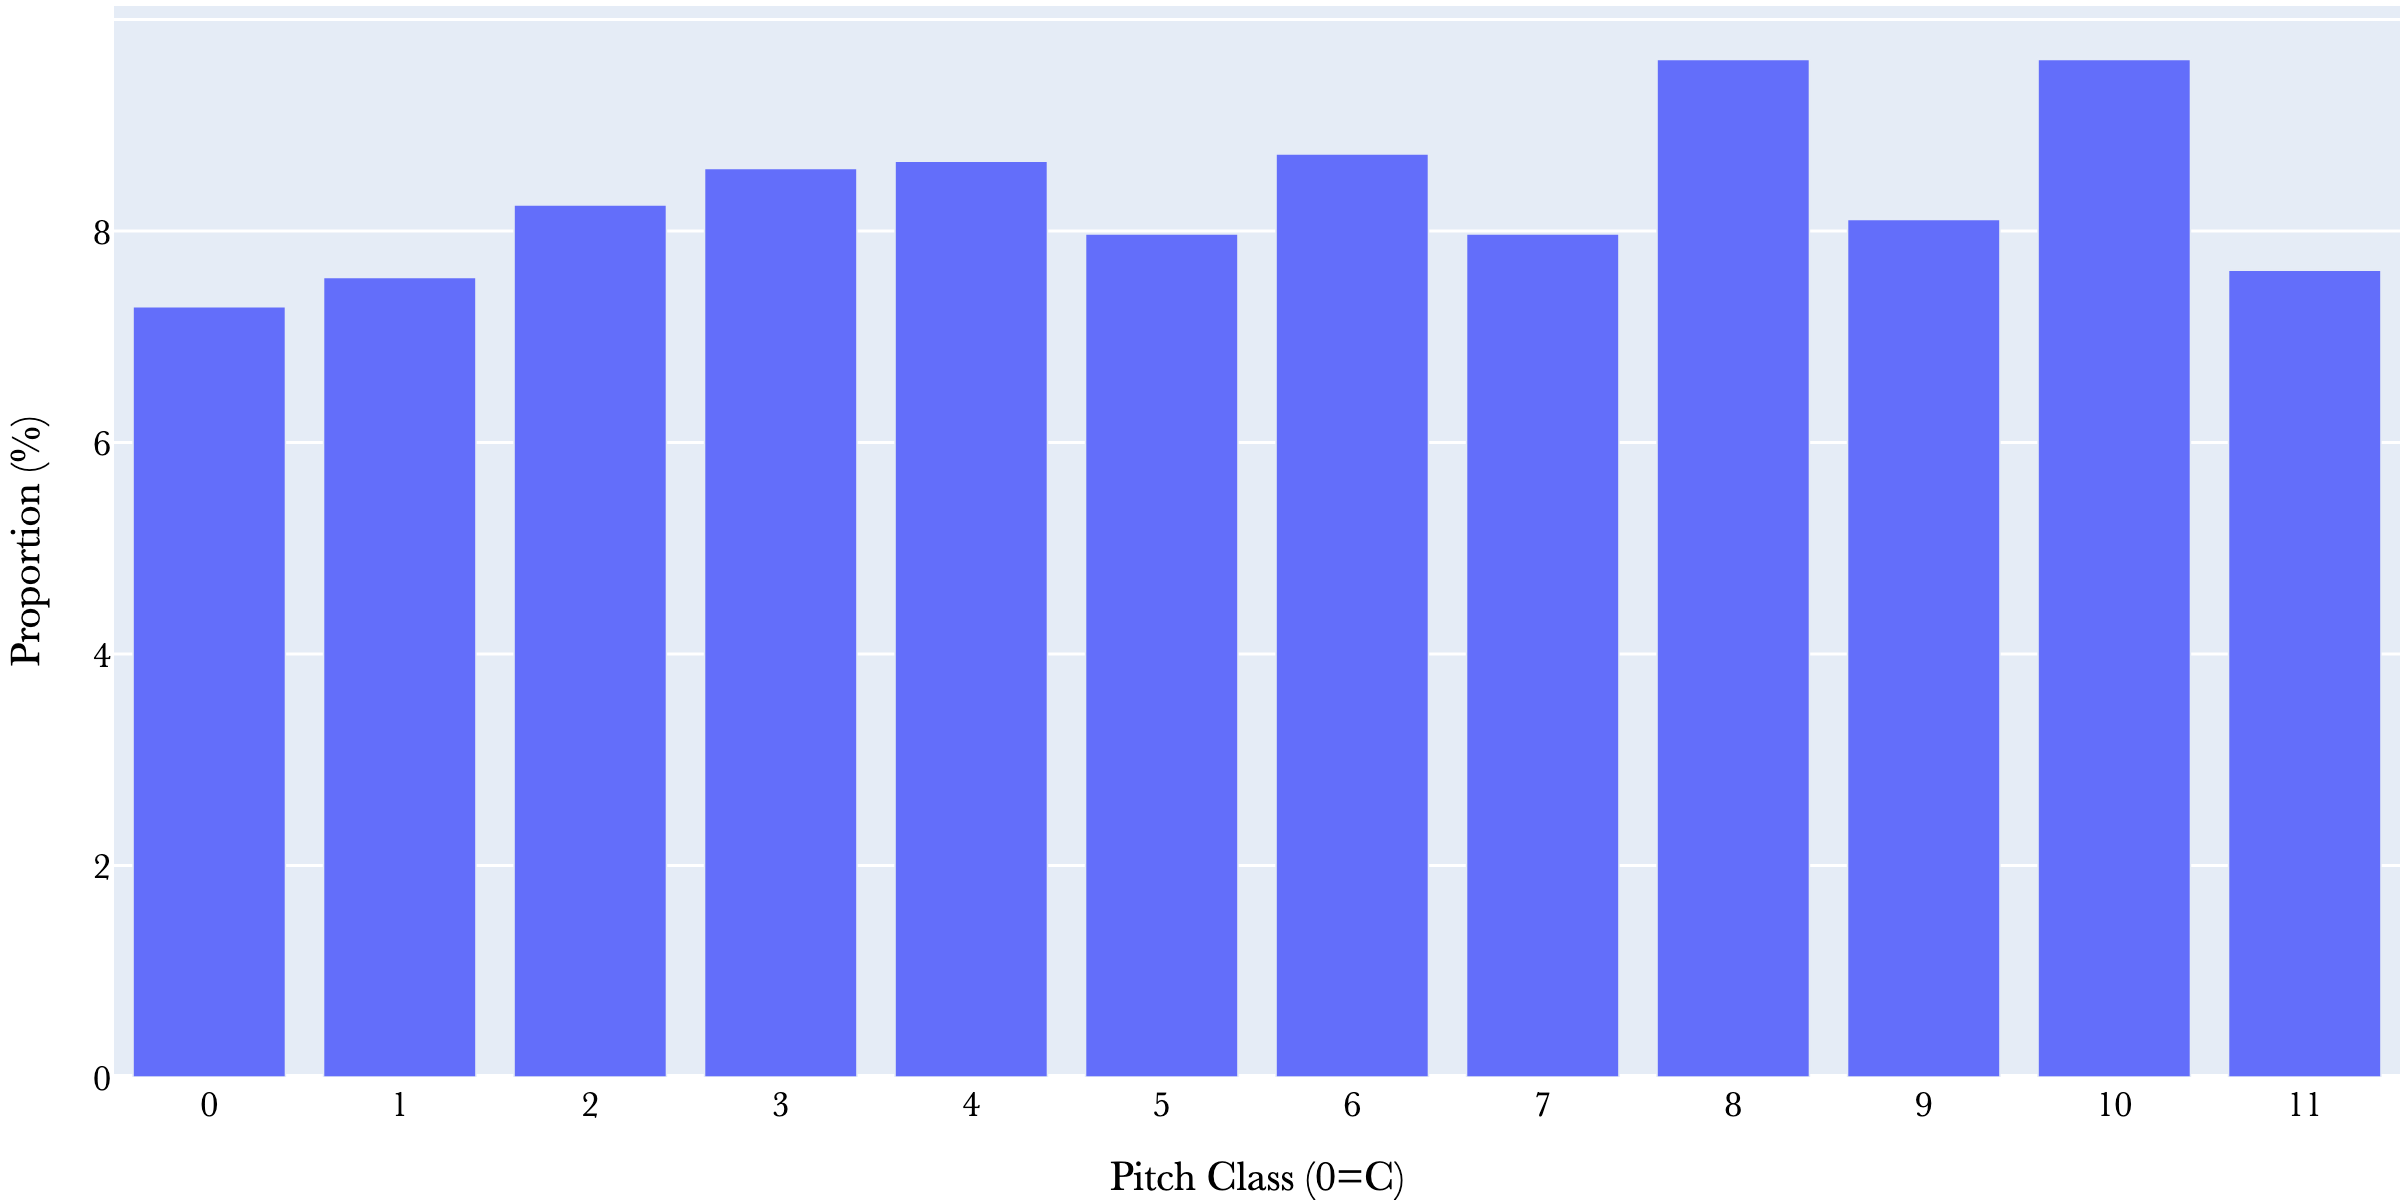

In [3]:
barChartMaker("Op. 18 i")

In [3]:
revisedData = pd.DataFrame([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], columns = ['title'])
revisedData['Pitch Class'] = [0,1,2,3,4,5,6,7,8,9,10,11]
revisedData

,title,Pitch Class
0,1,0
1,0,1
2,0,2
3,1,3
4,0,4
5,0,5
6,1,6
7,0,7
8,0,8
9,1,9


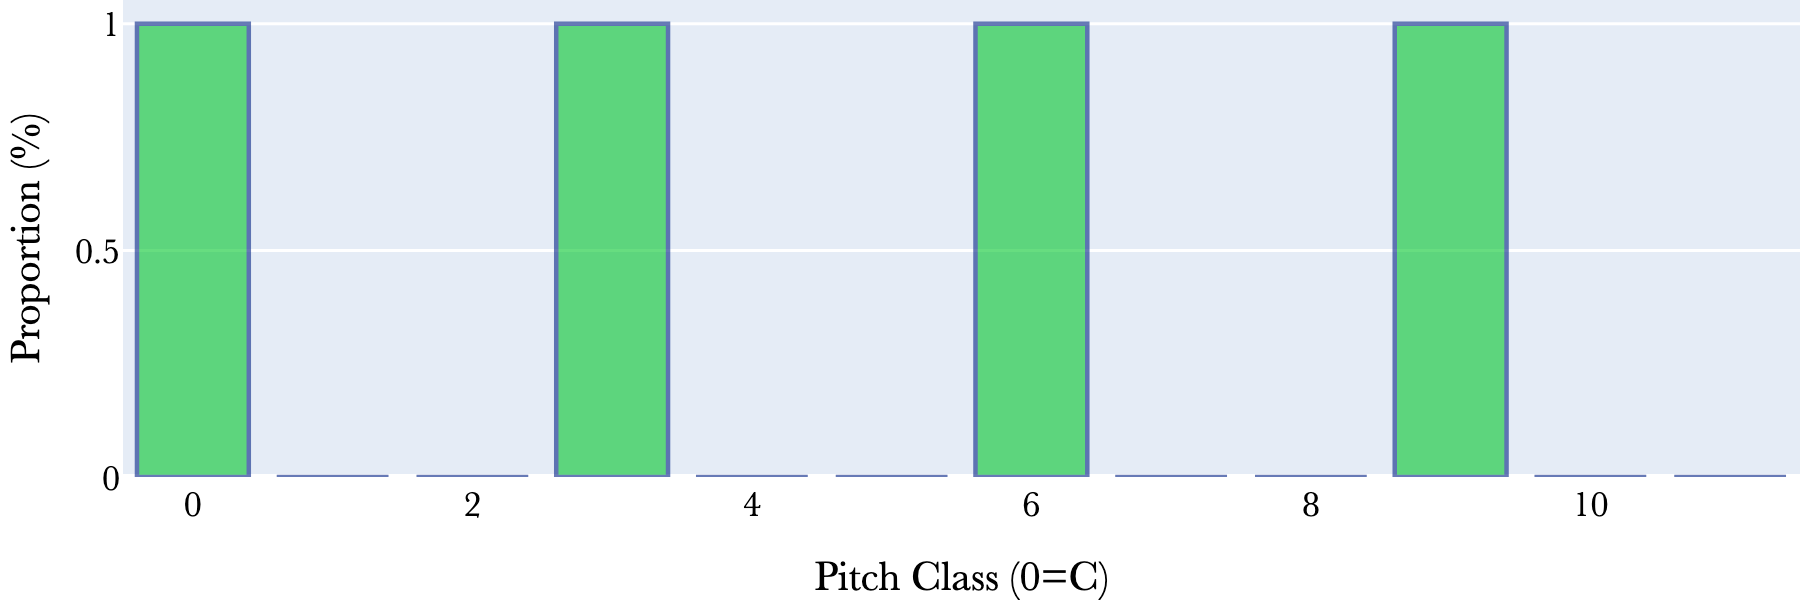

In [50]:
fig = px.bar(revisedData, x ='Pitch Class', y ='title', labels={'Pitch Class': 'Pitch Class (0=C)', 'title':'Proportion (%)'})
fig.update_traces(marker_color='rgb(3,199,45)', marker_line_color='rgb(3,35,134)', marker_line_width=1.5, opacity=0.6)
#fig.update_layout(title={'text': newChartTitle, 'font':dict(family="Big Caslon, monospace", size=20, color='rgb(0,0,0)'), 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_layout(font=dict(family="Baskerville, monospace", size=12, color='rgb(0,0,0)'))
fig.update_layout(margin={'l': 0, 'r': 0, 't': 0, 'b': 0})

img_bytes = fig.to_image(format="png", width=600, height=200, scale=3)
Image(img_bytes)

In [26]:

#data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col='Title')
#revisedData = data2[[title]]
generic = "Pitch Class Profile"
chartTitle = (title, generic)
newChartTitle = str(chartTitle).replace("'", "").replace("(", "").replace(")", "").replace(",", ":")    
#revisedData = revisedData.iloc[0:12, :]
#revisedData['Pitch Class'] = revisedData.index
fig = px.bar(revisedData, x ='Pitch Class', y =title, labels={'Pitch Class': 'Pitch Class (0=C)', title:'Proportion (%)'})
fig.update_traces(marker_color='rgb(3,199,45)', marker_line_color='rgb(3,35,134)', marker_line_width=1.5, opacity=0.6)
#fig.update_layout(title={'text': newChartTitle, 'font':dict(family="Big Caslon, monospace", size=20, color='rgb(0,0,0)'), 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_layout(font=dict(family="Baskerville, monospace", size=12, color='rgb(0,0,0)'))
fig.update_layout(margin={'l': 0, 'r': 0, 't': 0, 'b': 0})
img_bytes = fig.to_image(format="png", width=600, height=200, scale=3)
return Image(img_bytes)

NameError: name 'title' is not defined

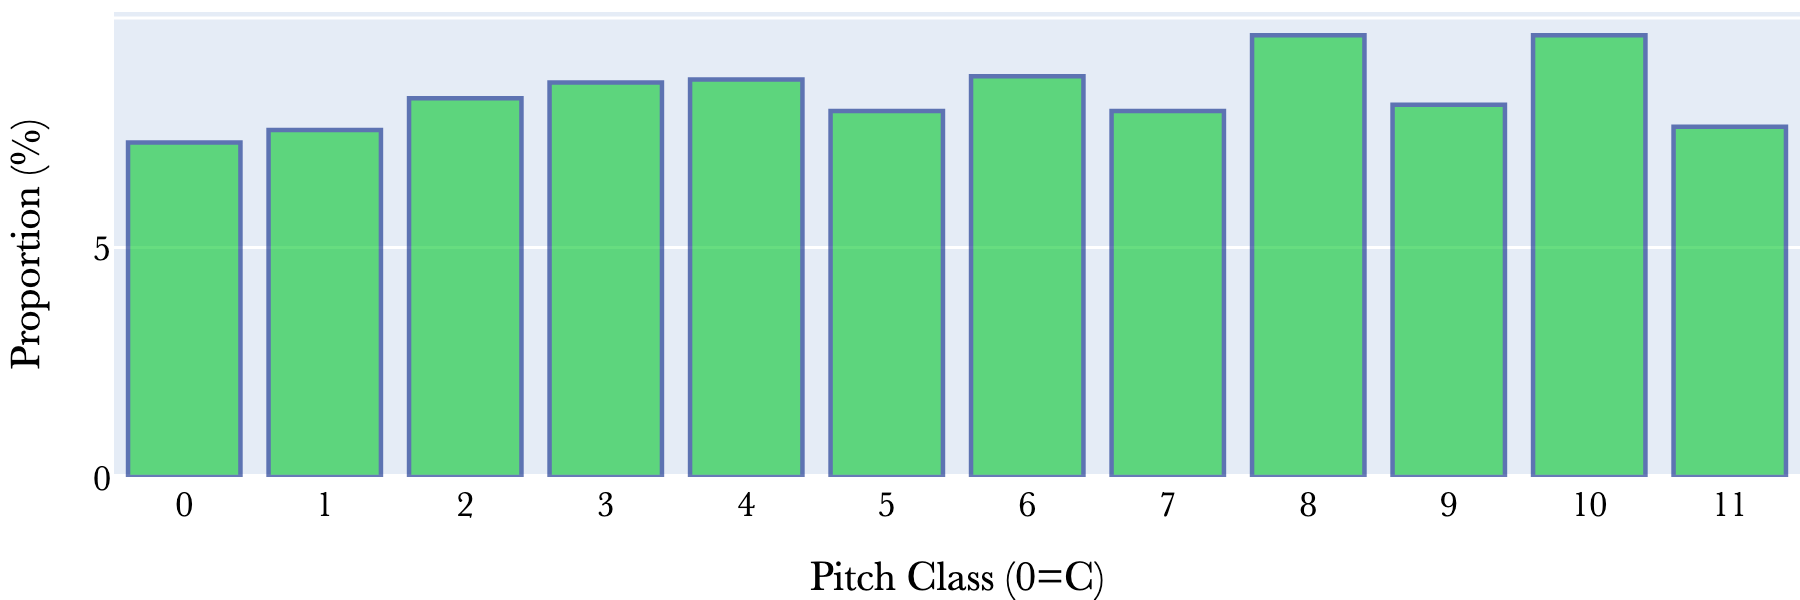

In [4]:
barChartMaker('Op. 18 i')

In [11]:
data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col='Title')
revisedData = data2.iloc[:12 , :]
revisedData = revisedData.transpose().loc['Op. 10 iii']
listOfValues= []
for el in revisedData.values.flat:
    listOfValues.append(el)
firstQuartile = np.percentile(listOfValues, 25)
thirdQuartile = np.percentile(listOfValues, 75)
IQR = thirdQuartile-firstQuartile
print(IQR)
quartileCutoff = thirdQuartile+1.5*IQR
print('Anomaly Cutoff =', quartileCutoff)
listOfAnomalies = []
for el in revisedData.values.flat:
    if el > quartileCutoff:
        listOfAnomalies.append(el)
print('Anomaly Values =', listOfAnomalies)
for el in listOfAnomalies:
    for i in listOfValues:
        if el == i:
            pos = listOfValues.index(i)
            print('Anomalous pc =', pos)
            #tempDF = revisedData.iloc[pos:pos+1, :]
            #print(tempDF)

5.210225798079419
Anomaly Cutoff = 16.399558785362057
Anomaly Values = [34.051388528419416]
Anomalous pc = 4


In [18]:
revisedData = data2.iloc[:12 , :]
revisedData = revisedData.loc['Op. 11 i']
listOfValues= []
for el in revisedData.values.flat:
    listOfValues.append(el)
firstQuartile = np.percentile(listOfValues, 25)
thirdQuartile = np.percentile(listOfValues, 75)
IQR = thirdQuartile-firstQuartile
print(IQR)
quartileCutoff = thirdQuartile+1.5*IQR
print('Anomaly Cutoff =', quartileCutoff)
listOfAnomalies = []
for el in revisedData.values.flat:
    if el > quartileCutoff:
        listOfAnomalies.append(el)
for el in listOfAnomalies:
    for i in listOfValues:
        if el == i:
            pos = listOfValues.index(i)
            tempDF = revisedData.iloc[:, pos:pos+1]
            print(tempDF)

KeyError: 'Op. 11 i'

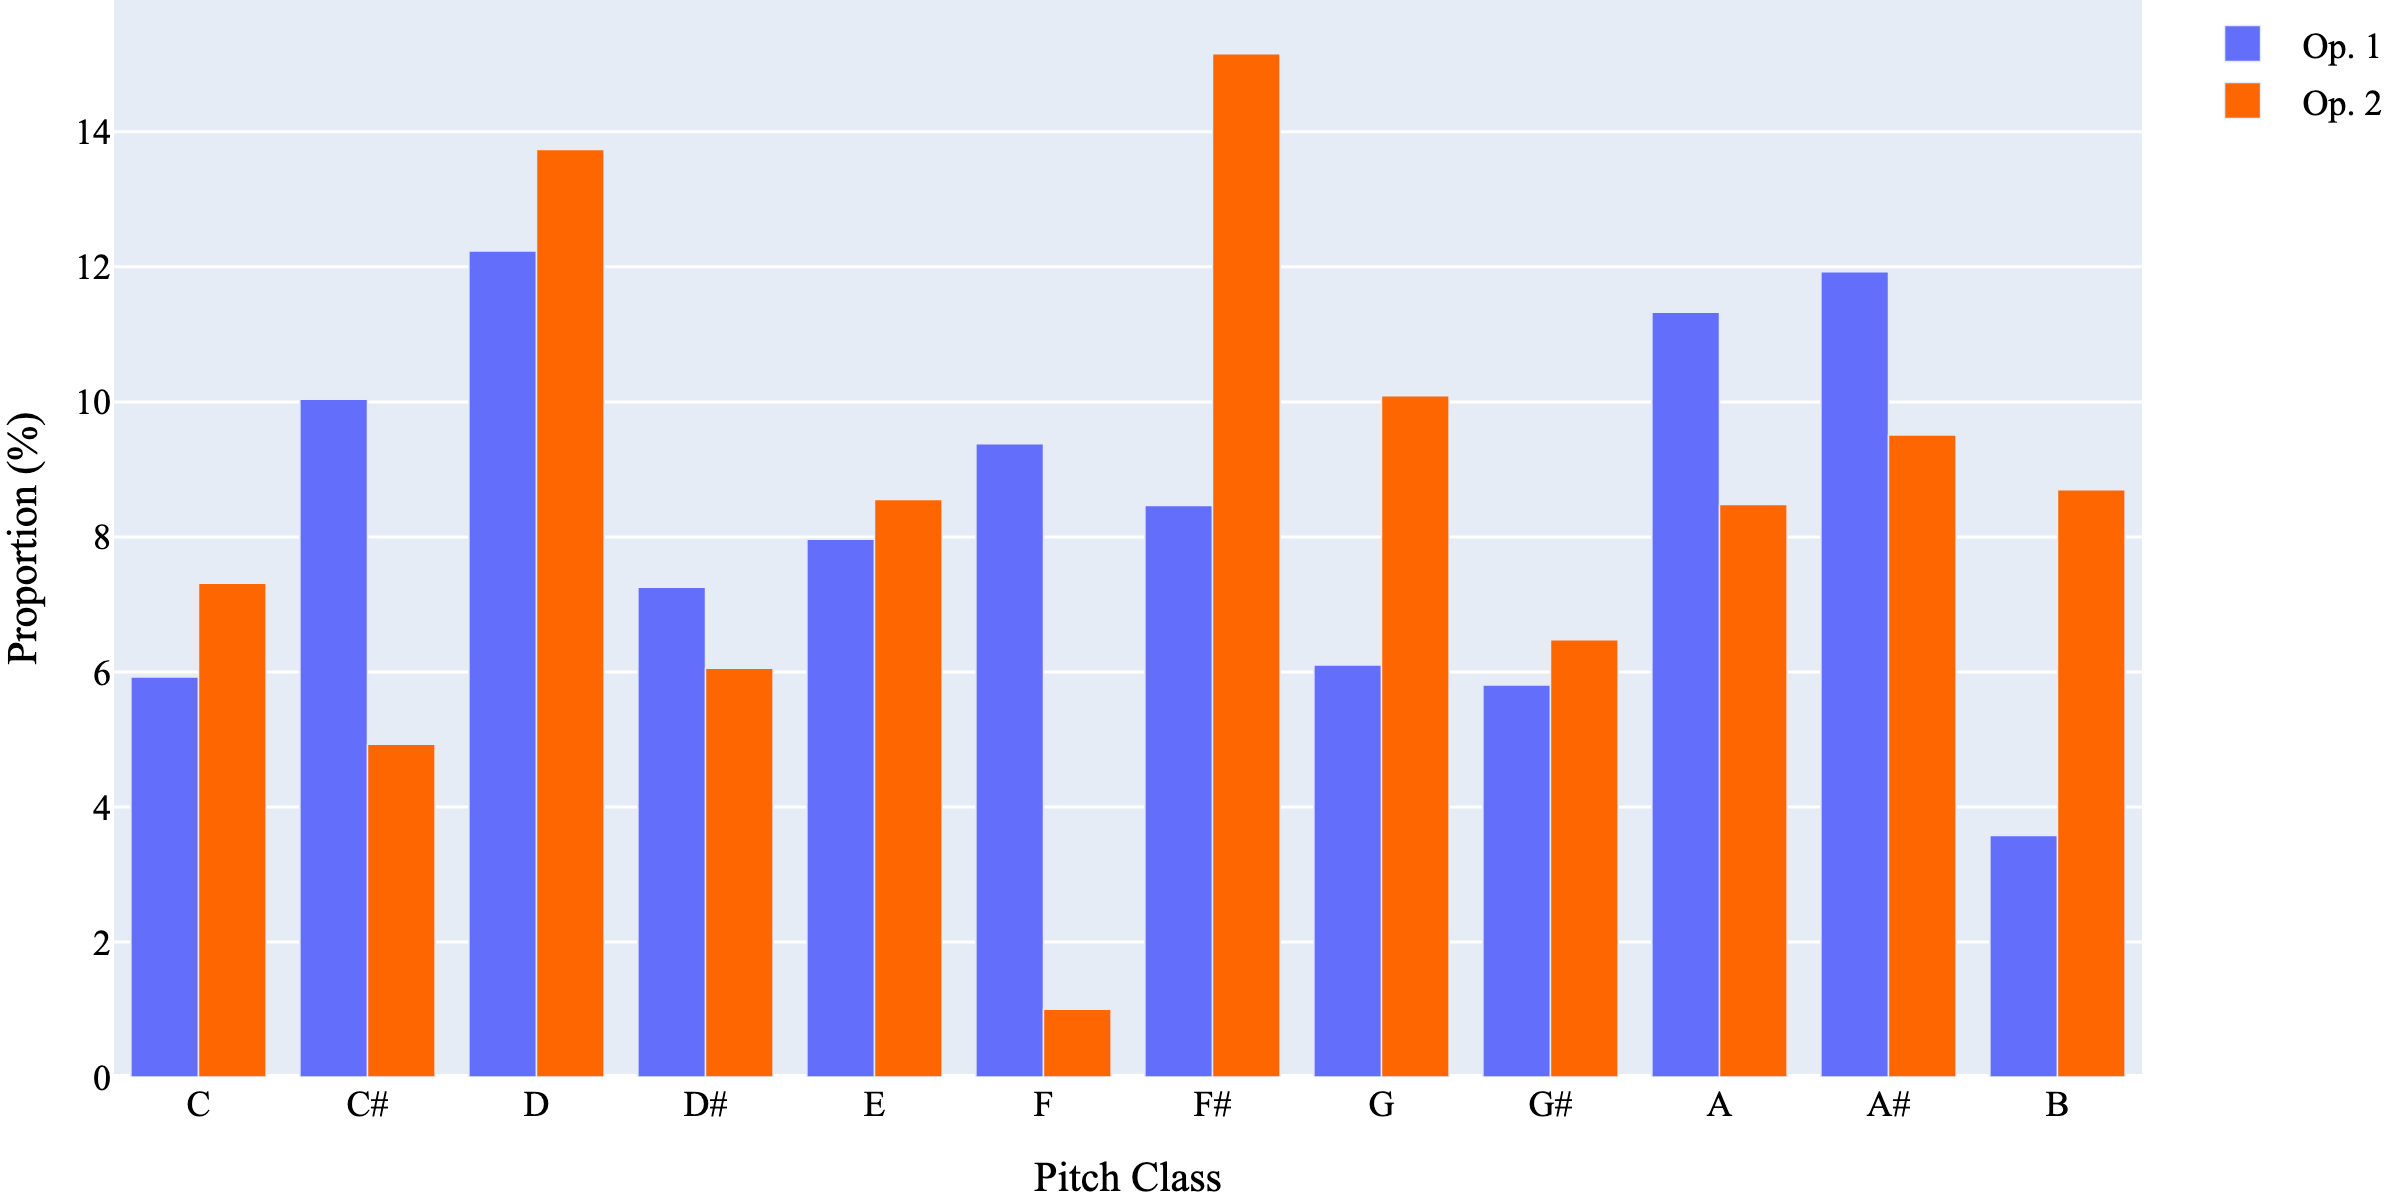

In [25]:
fig = go.Figure()
data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col='Title')

revisedData = data2[['Op. 1']]
generic = "Pitch Class Profile"
chartTitle = ('Op. 1', generic)
newChartTitle = str(chartTitle).replace("'", "").replace("(", "").replace(")", "").replace(",", ":")    
revisedData = revisedData.iloc[0:12, :]
revisedData['Pitch Class'] = revisedData.index
listOfValues = []
for i in range(0,len(revisedData.values)):
    temp = []
    #temp.append(revisedData.index[i])
    j = revisedData.values[i]
    temp.append(j[1])
    temp.append(j[0])
    listOfValues.append(temp)

listOfXAxis = []
listOfOp1YAxis = []
for el in listOfValues:
    #fig.add_trace(go.Bar(x =int(el[0]), y =float(el[1])))
    listOfXAxis.append(int(el[0]))
    listOfOp1YAxis.append(float(el[1]))

revisedData = data2[['Op. 2']]
generic = "Pitch Class Profile"
chartTitle = ('Op. 2', generic)
newChartTitle = str(chartTitle).replace("'", "").replace("(", "").replace(")", "").replace(",", ":")    
revisedData = revisedData.iloc[0:12, :]
revisedData['Pitch Class'] = revisedData.index
listOfValues = []
for i in range(0,len(revisedData.values)):
    temp = []
    #temp.append(revisedData.index[i])
    j = revisedData.values[i]
    temp.append(j[1])
    temp.append(j[0])
    listOfValues.append(temp)

listOfXAxis = []
listOfOp2YAxis = []
for el in listOfValues:
    #fig.add_trace(go.Bar(x =int(el[0]), y =float(el[1])))
    listOfXAxis.append(int(el[0]))
    listOfOp2YAxis.append(float(el[1]))
    
revisedData = data2[['Op. 11 ii']]
generic = "Pitch Class Profile"
chartTitle = ('Op. 10 iv', generic)
newChartTitle = str(chartTitle).replace("'", "").replace("(", "").replace(")", "").replace(",", ":")    
revisedData = revisedData.iloc[0:12, :]
revisedData['Pitch Class'] = revisedData.index
listOfValues = []
for i in range(0,len(revisedData.values)):
    temp = []
    #temp.append(revisedData.index[i])
    j = revisedData.values[i]
    temp.append(j[1])
    temp.append(j[0])
    listOfValues.append(temp)

listOfXAxis = []
listOfOp3YAxis = []
for el in listOfValues:
    #fig.add_trace(go.Bar(x =int(el[0]), y =float(el[1])))
    listOfXAxis.append(int(el[0]))
    listOfOp3YAxis.append(float(el[1]))

xAxis = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    
fig.add_trace(go.Bar(x =xAxis, y =listOfOp1YAxis, name='Op. 1'))
fig.add_trace(go.Bar(x =xAxis, y =listOfOp2YAxis, marker_color='rgb(253,102,0)', name='Op. 2'))
#fig.add_trace(go.Bar(x =xAxis, y =listOfOp3YAxis, marker_color='rgb(75,0,130)', marker_line_color='rgb(6,0,19)', marker_line_width=1.5, opacity=0.6, name='Op. 10/iv'))


fig.update_layout(xaxis=(dict(title={'text': 'Pitch Class'})))
fig.update_layout(yaxis=(dict(title={'text': 'Proportion (%)'})))
fig.update_layout(font=dict(family="Times New Roman, monospace", size=12, color='rgb(0,0,0)'))
fig.update_layout(margin={'l': 0, 'r': 0, 't': 0, 'b': 0})
fig.show()


img_bytes = fig.to_image(format="png", width=800, height=400, scale=3, engine='orca')
Image(img_bytes)


Mean average for non-serial vs serial works

In [74]:
data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col=0)
nonSerial = data2.iloc[12:13 , :67]
serial = data2.iloc[12:13, 67:]

nonSerialMean = statistics.mean(nonSerial.values.flat)
serialMean = statistics.mean(serial.values.flat)

print(nonSerialMean)
print(serialMean)

nonSerialMean-serialMean

8.950722745595012
4.571186872303933


4.379535873291079

Mean average for pieces up to and including Op. 11, and after Op. 11

In [30]:
data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col=0)
upTo = data2.iloc[12:13 , :43]
After = data2.iloc[12:13, 43:]

upToMean = statistics.mean(upTo.values.flat)
afterMean = statistics.mean(After.values.flat)

print(upToMean)
print(afterMean)

upToMean-afterMean

11.24917407887016
4.860393012179508


6.388781066690652

In [31]:
data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col=0)

titles = data2.columns
listOfTitles = []
for el in titles:
    listOfTitles.append(el)
results = []
justResults = []
for i in range(0, len(titles)):
    tempdata = data2.iloc[:, i:i+1]
    firstValues = tempdata.values
    secondValues = []
    for el in firstValues:
        secondValues.append(el)
    temp = []
    maximumValue = max(secondValues)
    for j in secondValues:
        if j == maximumValue:
            temp.append(secondValues.index(j))
    newTemp = []
    newTemp.append(titles[i])
    newTemp.append(temp[0])
    results.append(newTemp)
    justResults.append(temp[0])

songs = ['Op. 2', 'Op. 3', 'Op. 4', 'Op. 8', 'Op. 12', 'Op. 13', 'Op. 14', 'Op. 15', 'Op. 16', 'Op. 17', 'Op. 18', 'Op. 19', 'Op. 23', 'Op. 25', 'Op. 26', 'Op. 29', 'Op. 31']
notSongs = ['Op. 1', 'Op. 5', 'Op. 6', 'Op. 7', 'Op. 9', 'Op. 10', 'Op. 11', 'Op. 20', 'Op. 21', 'Op. 22', 'Op. 24', 'Op. 27', 'Op. 28', 'Op. 30']

songWindows = []
notSongWindows = []

songData = []
notSongData = []

for el in listOfTitles:
    position = listOfTitles.index(el)
    opusNumber = el.replace("i", "").replace("v", "").replace(" ", "")
    for i in songs:
        if i.replace(" ", "") == opusNumber:
            movementWindow = data2.iloc[12:13, position: position+1].values
            songWindows.append(movementWindow)
            temp = []
            temp.append(position)
            temp.append(int(opusNumber.replace("Op.", "")))
            temp.append(movementWindow)
            songData.append(temp)
    for i in notSongs:
        if i.replace(" ", "") == opusNumber:
            movementWindow = data2.iloc[12:13, position: position+1].values
            notSongWindows.append(movementWindow)
            temp = []
            temp.append(position)
            temp.append(int(opusNumber.replace("Op.", "")))
            temp.append(movementWindow)
            notSongData.append(temp)

firstNewList = []
for el in songWindows:
    if len(el) == 1:
        firstNewList.append(float(el))
        
secondNewList = []
for el in notSongWindows:
    if len(el) == 1:
        secondNewList.append(float(el))

sungMean = sum(firstNewList)/len(firstNewList) #this is the mean average for all sung movements
instrumentalMean = sum(secondNewList)/len(secondNewList) #this is the mean average for all instrumental movements

songData.sort(key=lambda x: x[1])
notSongData.sort(key=lambda x: x[1])

difference = instrumentalMean-sungMean

print(sungMean)
print(instrumentalMean)
print(difference)

5.912027235478374
9.437956017537493
3.525928782059119


Cumulative moving mean average for range of pc distribution

In [35]:
data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col=0)

listOfNumbers = []
i = 1
while i < len(data2.columns)+1:
    listOfNumbers.append(i)
    i+=1

newList = []
for el in listOfNumbers:
    tempData = data2.iloc[12:13 , 0: el]
    tempAverage = statistics.mean(tempData.values.flat)
    newList.append(tempAverage)

data2.loc[13] = newList 

data2.iloc[13:14, :].values.flat

listOfColumns = data2.columns
listOfTitles = []
for el in listOfColumns:
    listOfTitles.append(el)

fig = go.Figure()
fig.add_trace(go.Scatter(x = listOfTitles, y = data2.iloc[13:14, :].values.flat, mode='lines', name=el))
fig.update_traces(marker_color='rgb(3,199,45)', marker_line_color='rgb(3,35,134)', marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis=(dict(title={'text': 'Movement'})))
fig.update_layout(yaxis=(dict(title={'text': 'Mean Average (%)'})))
fig.update_layout(title={'text': 'Pitch Class Distribution: Cumulative Moving Average (Mean)', 'font':dict(family="Big Caslon, monospace", size=20, color='rgb(0,0,0)'), 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_layout(font=dict(family="Baskerville, monospace", size=12, color='rgb(0,0,0)'))

fig.show()

Exponential Moving Mean Average

In [36]:
revisedData = data2.iloc[12:13 , :]
listOfTitles = []
for el in revisedData.iloc[-1:0, :]:
    listOfTitles.append(el)
listOfRanges = []
for el in revisedData.values.flat:
    listOfRanges.append(el)


df = pd.DataFrame(listOfRanges, index =listOfTitles, columns =['Range'])
df['EMA'] = df.iloc[:,0].ewm(span=5,adjust=False).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x = listOfTitles, y = df['EMA'], mode='lines', name='EMA'))
fig.add_trace(go.Scatter(x = listOfTitles, y = listOfRanges, mode='markers', name='Range'))
fig.update_traces(marker_color='rgb(3,199,45)', marker_line_color='rgb(3,35,134)', marker_line_width=1.5, opacity=0.6)
fig.update_layout(xaxis=(dict(title={'text': 'Movement'})))
fig.update_layout(yaxis=(dict(title={'text': '%'})))
fig.update_layout(title={'text': 'Pitch Class Distribution: Exponential Moving Average (Mean)', 'font':dict(family="Big Caslon, monospace", size=20, color='rgb(0,0,0)'), 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_layout(font=dict(family="Baskerville, monospace", size=12, color='rgb(0,0,0)'))

fig.show()

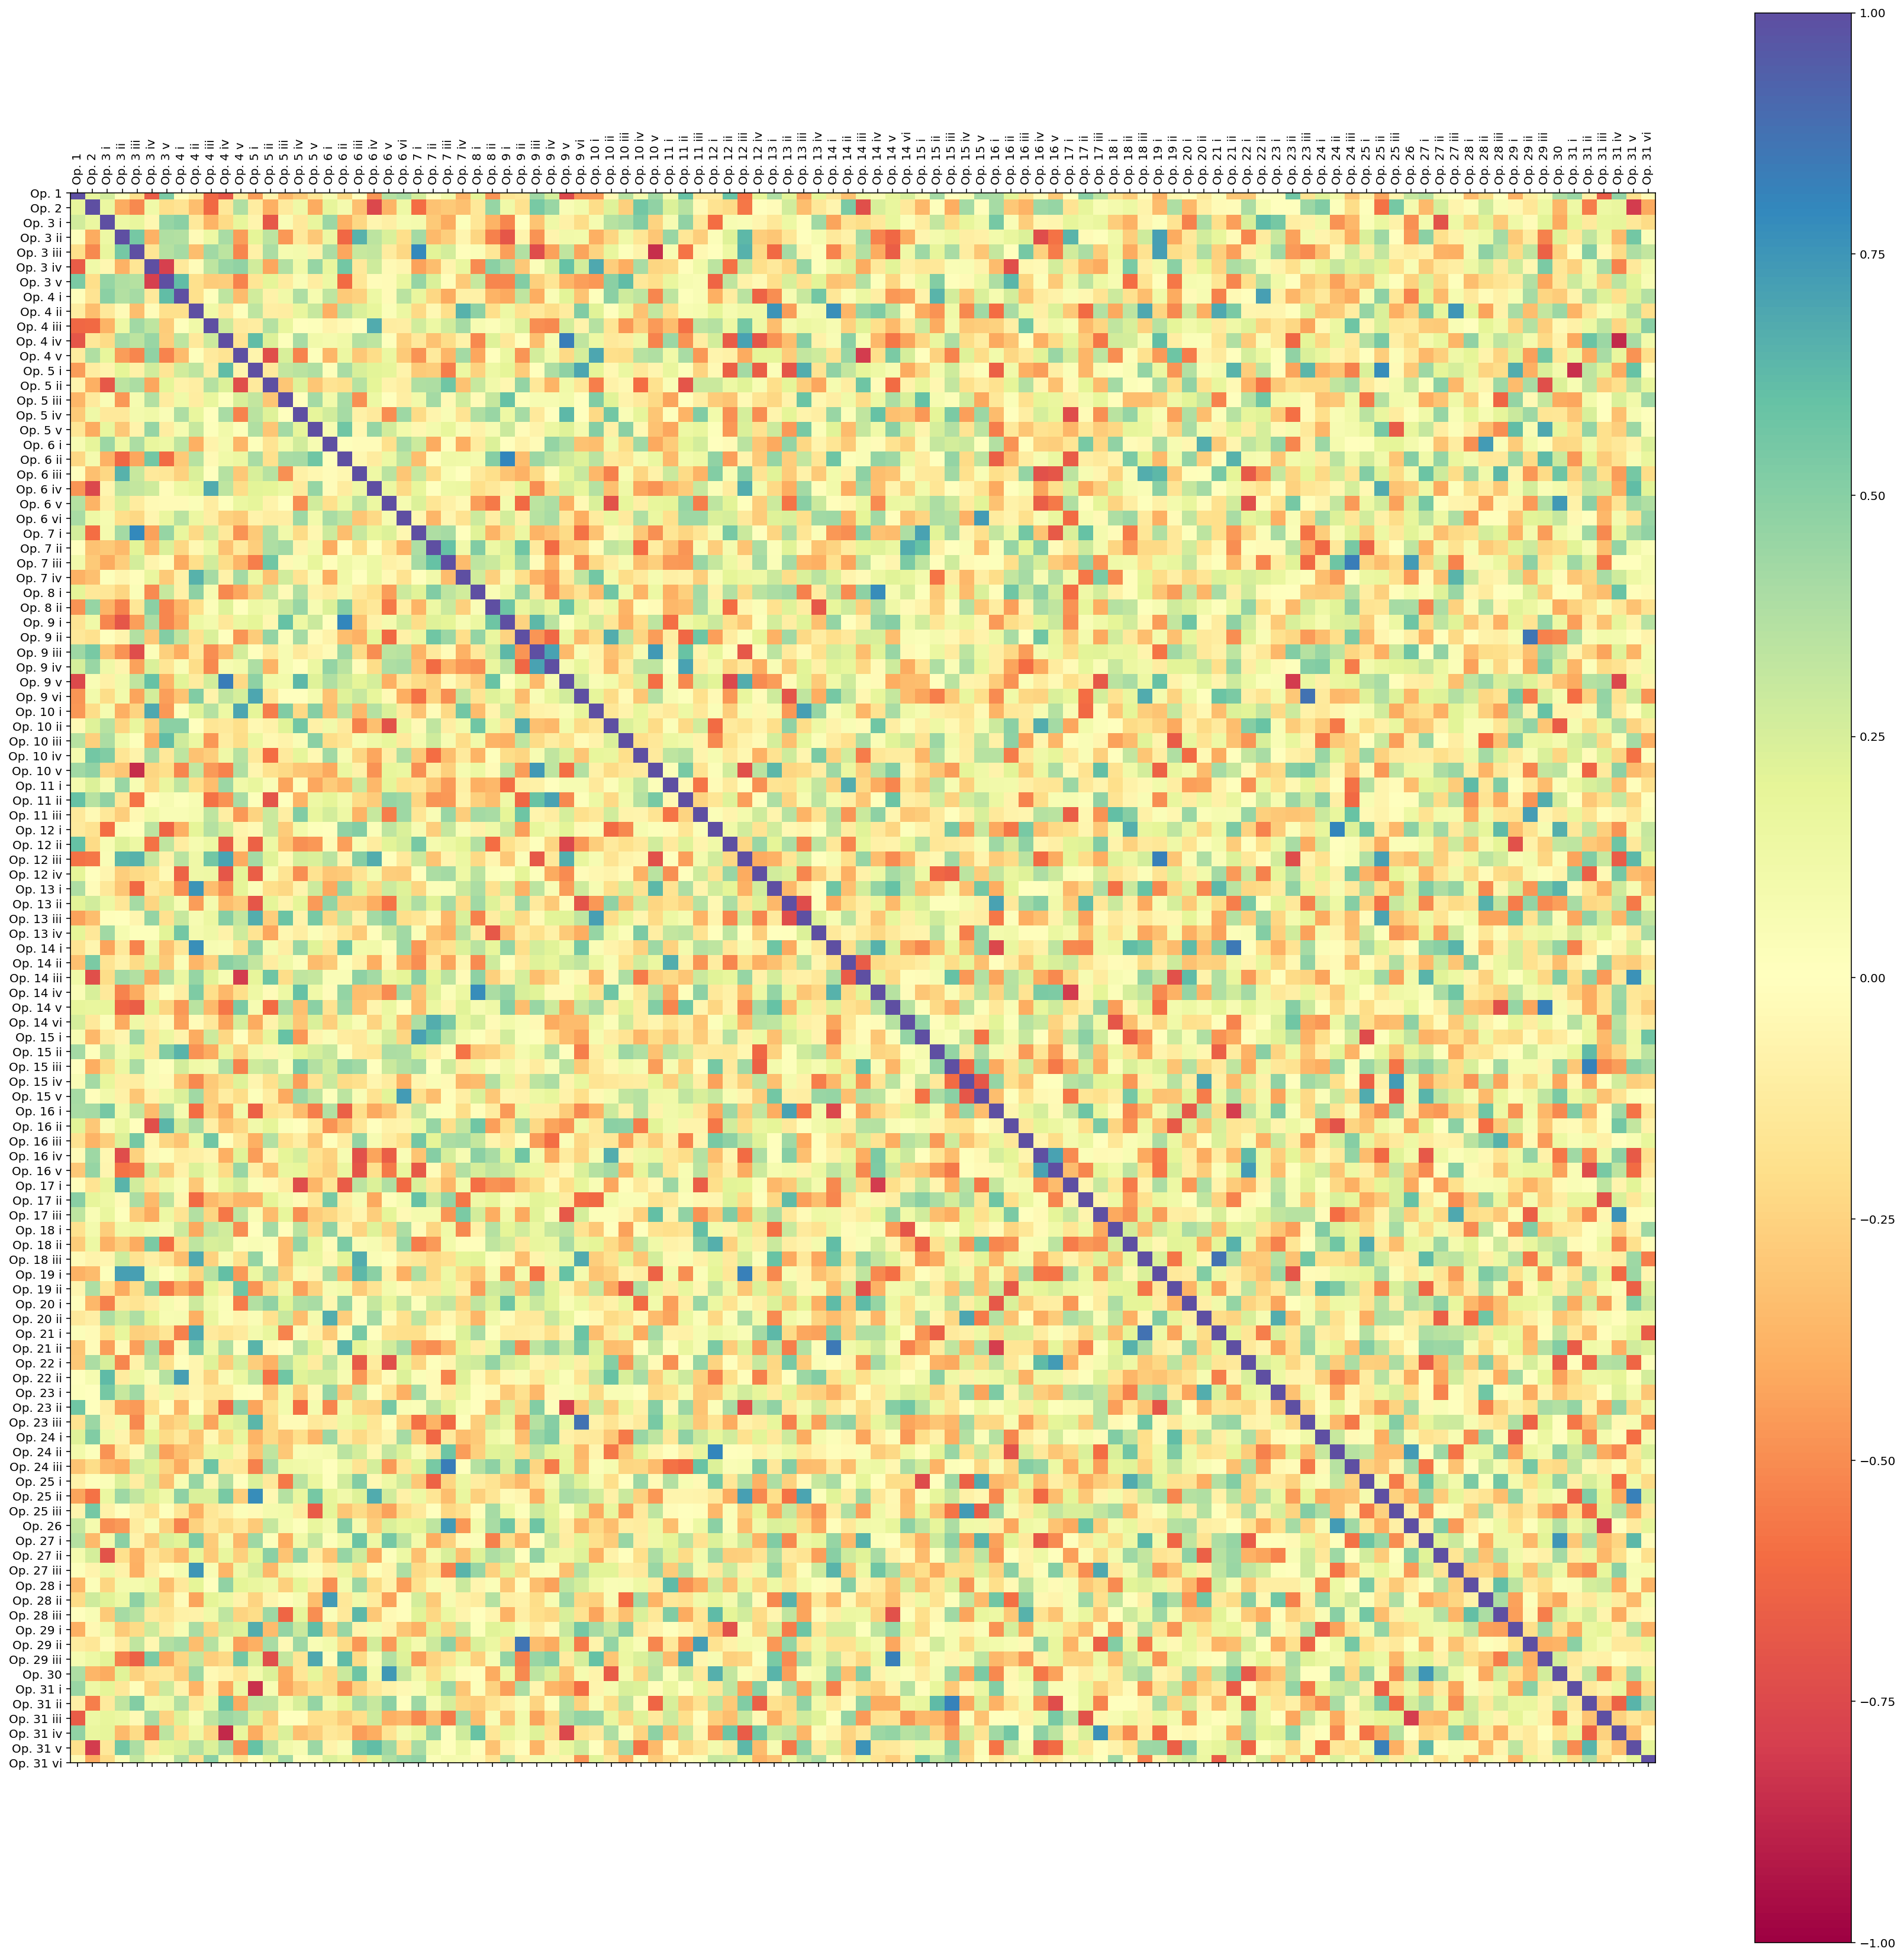

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col=0)
revisedData = data.iloc[:12 , :]
corr = revisedData.corr(method = 'spearman')
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='Spectral', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.savefig('/Users/joshua ballance/Desktop/pitchclassprofilecorr.png')

In [17]:
sortedVals = sorted(corr.values.flat)
newVals = []
for el in sortedVals:
    if el == 1:
        pass
    else:
        newVals.append(el)
maximum = max(newVals)
minimum = min(newVals)
print(maximum)
print(minimum)

0.8371291296643237
-0.8811188811188811


In [18]:
corr.where(corr == maximum)

,Op. 1,Op. 2,Op. 3 i,Op. 3 ii,Op. 3 iii,Op. 3 iv,Op. 3 v,Op. 4 i,Op. 4 ii,Op. 4 iii,...,Op. 29 i,Op. 29 ii,Op. 29 iii,Op. 30,Op. 31 i,Op. 31 ii,Op. 31 iii,Op. 31 iv,Op. 31 v,Op. 31 vi
Op. 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Op. 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Op. 3 i,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Op. 3 ii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Op. 3 iii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Op. 31 ii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Op. 31 iii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Op. 31 iv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Op. 31 v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculate Anomalies

In [9]:
revisedData = data2.iloc[12:13 , :]
listOfValues= []
for el in revisedData.values.flat:
    listOfValues.append(el)
firstQuartile = np.percentile(listOfValues, 25)
thirdQuartile = np.percentile(listOfValues, 75)
IQR = thirdQuartile-firstQuartile
print(IQR)
quartileCutoff = thirdQuartile+1.5*IQR
print('Anomaly Cutoff =', quartileCutoff)
listOfAnomalies = []
for el in revisedData.values.flat:
    if el > quartileCutoff:
        listOfAnomalies.append(el)
for el in listOfAnomalies:
    for i in listOfValues:
        if el == i:
            pos = listOfValues.index(i)
            tempDF = revisedData.iloc[:, pos:pos+1]
            print(tempDF)

5.280107946480988
Anomaly Cutoff = 16.65411918558116
        Op. 10 i
Title           
Range  21.218466
       Op. 10 iii
Title            
Range   32.961329


Greatest chronologically-consecutive partition

In [76]:
data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col=0)

listOfPartitionDifferences = []
listOfJustDifferences = []
for i in range(1, len(data2.iloc[12:13, :].values.flat)):
    firstSection = data2.iloc[12:13, :i]
    secondSection = data2.iloc[12:13, i:]
    firstSectionValuesMean = sum(firstSection.values.flat)/len(firstSection.values.flat)
    secondSectionValuesMean = sum(secondSection.values.flat)/len(secondSection.values.flat)
    if firstSectionValuesMean-secondSectionValuesMean > 0:
        difference = firstSectionValuesMean-secondSectionValuesMean
    else:
        difference = secondSectionValuesMean-firstSectionValuesMean
    temp = []
    temp.append(i)
    temp.append(difference)
    listOfPartitionDifferences.append(temp)
    listOfJustDifferences.append(difference)
listOfPartitionDifferences.sort(key=lambda x: x[1])
listOfPartitionDifferences

[[104, 0.8457141105622075],
 [106, 0.928327135288967],
 [101, 1.4414292639594866],
 [105, 1.725714236675226],
 [103, 1.8836090963247623],
 [102, 1.8887343150356175],
 [100, 1.9298230828868395],
 [13, 1.9465308405756456],
 [14, 2.005072925758988],
 [1, 2.1083743445568572],
 [6, 2.2898228507309852],
 [10, 2.334319441425639],
 [12, 2.4139086644321504],
 [11, 2.428548876400497],
 [99, 2.4330066730633817],
 [97, 2.4762629042653126],
 [9, 2.5515578708095763],
 [7, 2.56471788929354],
 [15, 2.5915368170442266],
 [98, 2.6564223801535114],
 [8, 2.753274741304529],
 [96, 2.778665237837634],
 [5, 2.868792706102079],
 [92, 2.9813350229219573],
 [95, 3.07179633062539],
 [16, 3.0969021471789793],
 [90, 3.127955433996485],
 [91, 3.135201870817295],
 [89, 3.182898933684429],
 [4, 3.278671715256846],
 [94, 3.334105830569645],
 [88, 3.347424885563239],
 [93, 3.3510151566744213],
 [87, 3.4219117815961946],
 [17, 3.444365980120569],
 [19, 3.491045457391415],
 [85, 3.537541423118891],
 [18, 3.54996592909527

In [34]:
data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col=0)
data2 = data2.iloc[0:12, :]

listofResults = []
for el in range(0, 12):
    temp = [el]
    newList = data2.iloc[el: el+1,:].values.flat
    secondNewList = []
    for i in newList:
        if i == 0:
            pass
        else:
            secondNewList.append(i)
    temp.append(sum(secondNewList))
    listofResults.append(temp)
listofResults

[[0, 909.130536452696],
 [1, 933.4218781028824],
 [2, 876.8238242385828],
 [3, 885.9817143612978],
 [4, 911.1499625445575],
 [5, 882.8164379842515],
 [6, 918.5752480241022],
 [7, 862.1319722136143],
 [8, 872.4459115698476],
 [9, 851.1809944431427],
 [10, 888.782725452113],
 [11, 907.5587946129122]]

In [21]:
vals = data2.iloc[12:13, :].values.flat
list2 = []
for i in vals:
    list2.append(i)
max(list2)-min(list2)

25.81488774676947

This makes a pitch-class profile based on Albrecht & Shanahan, 2013

In [6]:
listOfPitchClasses = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
listOfDurationsMajor = [23.8, 0.6, 11.1, 0.6, 13.7, 9.4, 1.6, 21.4, 0.9, 0.8, 0.8, 8.1]
listOfDurationsMinor = [22, 0.6, 10.4, 12.3, 1.9, 10.3, 1.2, 21.4, 6.2, 2.2, 6.1, 5.2]

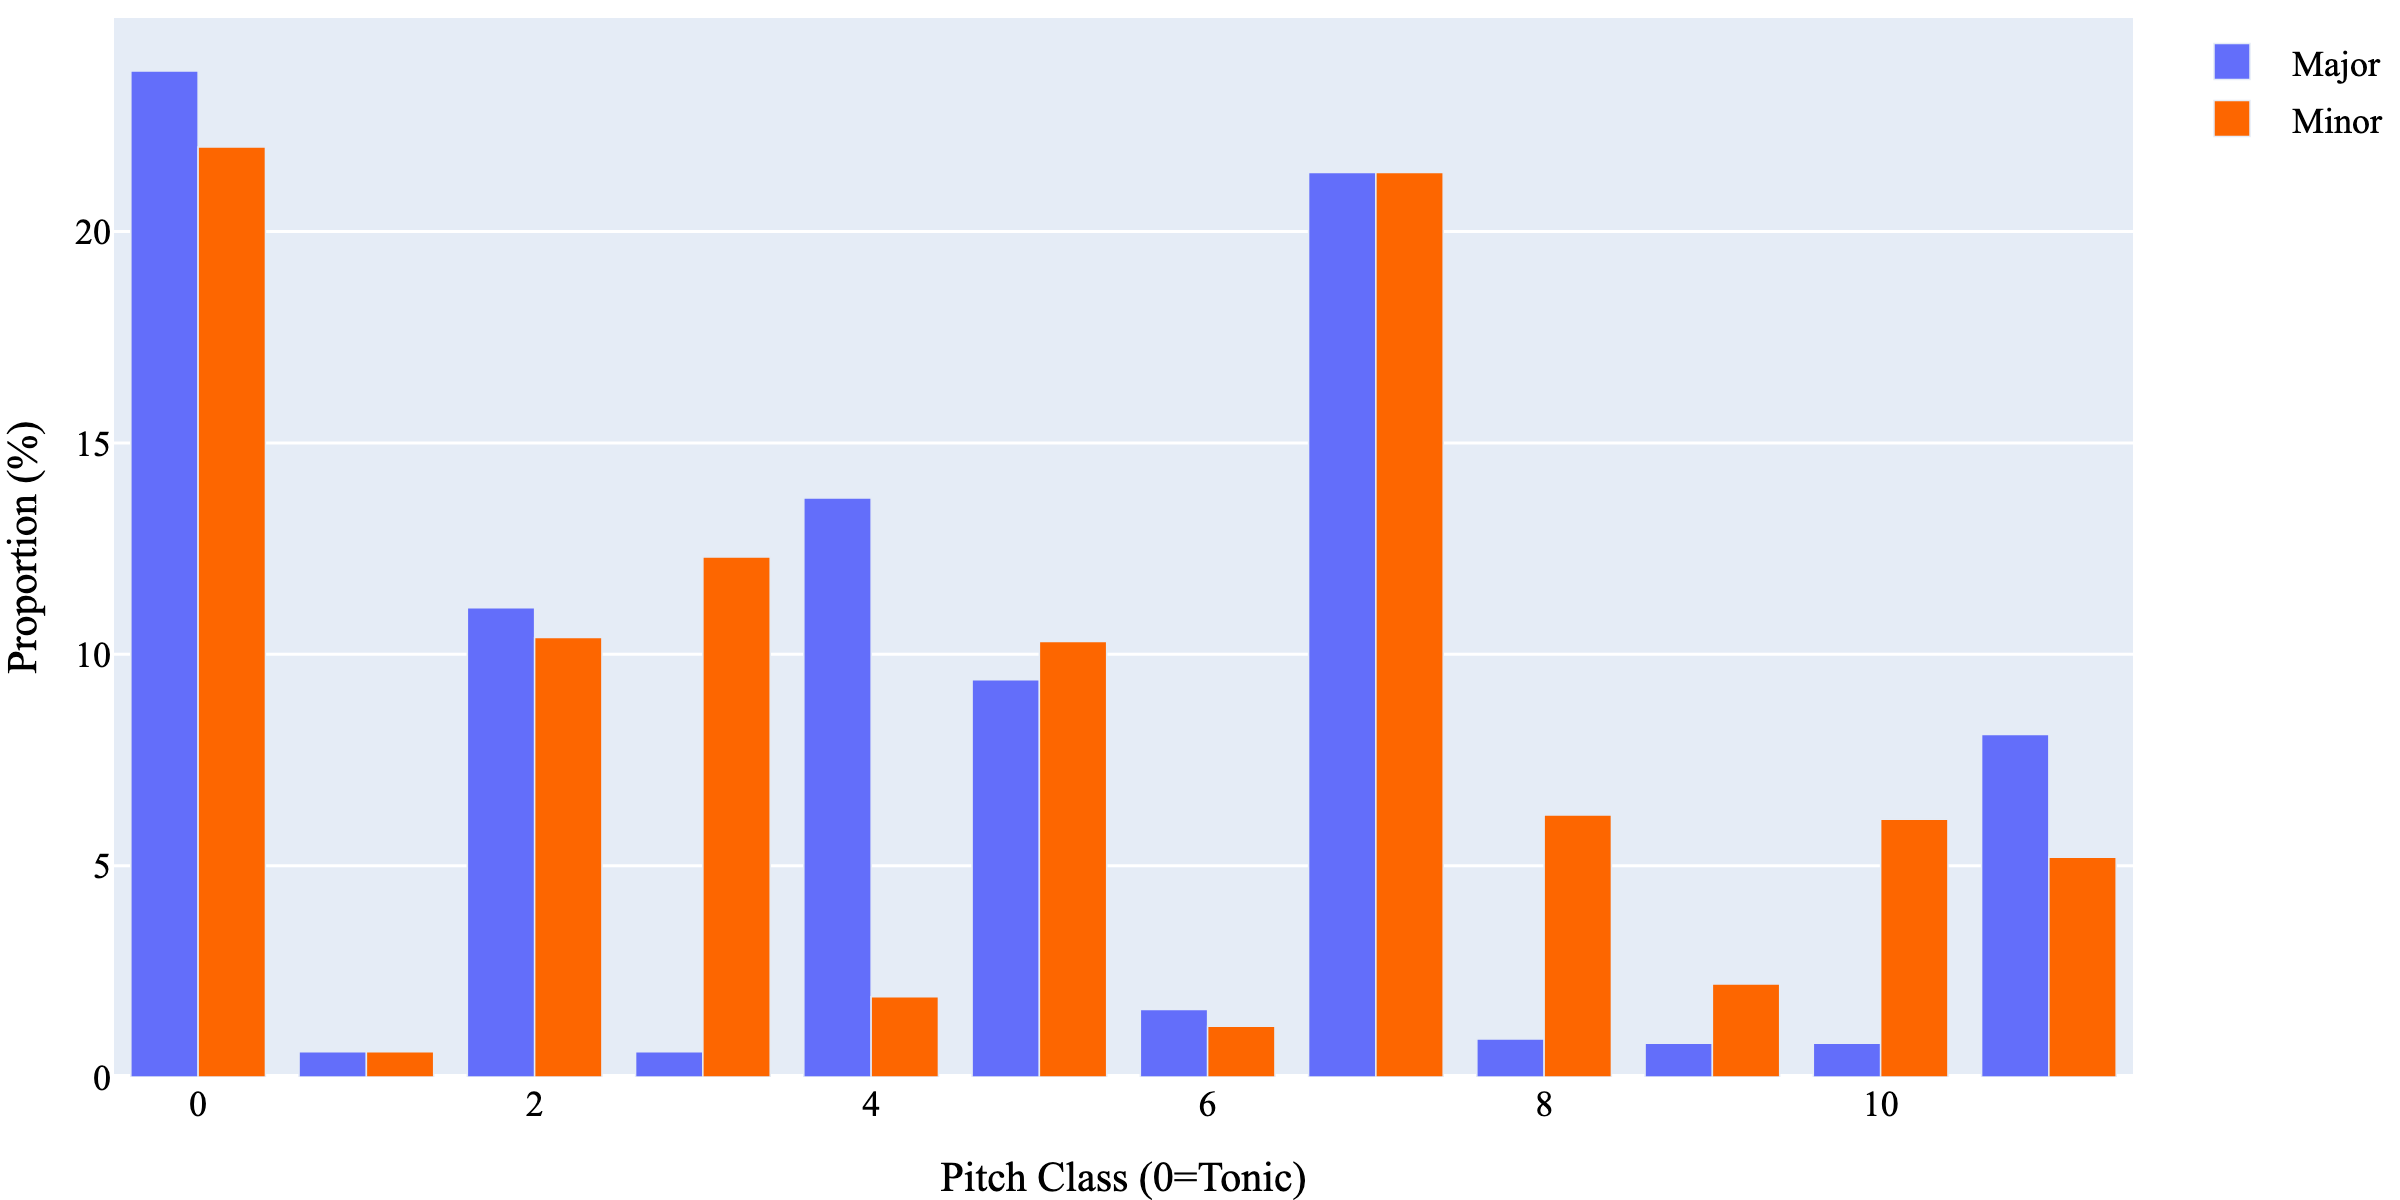

In [23]:
fig = go.Figure()
fig.add_trace(go.Bar(x =listOfPitchClasses, y =listOfDurationsMajor, name='Major'))
fig.add_trace(go.Bar(x =listOfPitchClasses, y =listOfDurationsMinor, name='Minor', marker_color='rgb(253,102,0)'))
fig.update_layout(xaxis=(dict(title={'text': 'Pitch Class (0=Tonic)'})))
fig.update_layout(yaxis=(dict(title={'text': 'Proportion (%)'})))
fig.update_layout(font=dict(family="Times New Roman, monospace", size=12, color='rgb(0,0,0)'))
fig.update_layout(margin={'l': 0, 'r': 0, 't': 0, 'b': 0})
img_bytes = fig.to_image(engine="orca",format="png", width=800, height=400, scale=3)
Image(img_bytes)

This calculates correlation between Op. 1 & Albrecht & Shanahan Minor Distribution

In [23]:
listOfDurationsMinor = [22, 0.6, 10.4, 12.3, 1.9, 10.3, 1.2, 21.4, 6.2, 2.2, 6.1, 5.2]
revisedData = data2.iloc[:12, 0:1]

listOfValues = []
for i in revisedData.values.flat:
    listOfValues.append(i)

secondListOfValues = listOfValues[2:]
secondListOfValues.append(listOfValues[0])
secondListOfValues.append(listOfValues[1])

df = pd.DataFrame(list(zip(listOfDurationsMinor, secondListOfValues)), columns =['Archetype', 'Values']) 
df

corr = df.corr(method="spearman")
corr

,Archetype,Values
Archetype,1.000000,0.608392
Values,0.608392,1.000000


This calculates correlation between Op. 1 & Albrecht & Shanahan Minor Distribution

In [24]:
listOfDurationsMajor = [23.8, 0.6, 11.1, 0.6, 13.7, 9.4, 1.6, 21.4, 0.9, 0.8, 0.8, 8.1]

revisedData = data2.iloc[:12, 1:2]

listOfValues = []
for i in revisedData.values.flat:
    listOfValues.append(i)

secondListOfValues = listOfValues[7:]
secondListOfValues.append(listOfValues[0])
secondListOfValues.append(listOfValues[1])
secondListOfValues.append(listOfValues[2])
secondListOfValues.append(listOfValues[3])
secondListOfValues.append(listOfValues[4])
secondListOfValues.append(listOfValues[5])
secondListOfValues.append(listOfValues[6])

print(secondListOfValues)

df = pd.DataFrame(list(zip(listOfDurationsMajor, secondListOfValues)), columns =['Archetype', 'Values']) 
df




corr = df.corr(method="spearman")
corr

[10.09056288768045, 6.476690995472039, 8.479588119973394, 9.50757291662815, 8.698940871283137, 7.313070053977206, 4.927768639014063, 13.736520416924968, 6.0558108467615, 8.554151911701965, 1.0045427746273266, 15.154779565956035]


,Archetype,Values
Archetype,1.00000,0.46667
Values,0.46667,1.00000


In [47]:
listOfDurationsMajor = [23.8, 0.6, 11.1, 0.6, 13.7, 9.4, 1.6, 21.4, 0.9, 0.8, 0.8, 8.1]
listOfDurationsMinor = [22, 0.6, 10.4, 12.3, 1.9, 10.3, 1.2, 21.4, 6.2, 2.2, 6.1, 5.2]

revisedData = data2.iloc[:12, 2:3]

listOfValues = []
for i in revisedData.values.flat:
    listOfValues.append(i)

for j in range(0,len(listOfValues)):
    tempListOfValues = listOfValues[j:]
    if j > 0:
        for k in range(0,j-1):
            tempListOfValues.append(listOfValues[k])

    df = pd.DataFrame(list(zip(listOfDurationsMajor, tempListOfValues)), columns =['Archetype', 'Values']) 

    corr = df.corr(method="spearman")
    print(corr)


           Archetype    Values
Archetype   1.000000 -0.224563
Values     -0.224563  1.000000
           Archetype    Values
Archetype   1.000000 -0.324204
Values     -0.324204  1.000000
           Archetype    Values
Archetype   1.000000  0.018265
Values      0.018265  1.000000
           Archetype    Values
Archetype   1.000000  0.187217
Values      0.187217  1.000000
           Archetype    Values
Archetype   1.000000  0.196349
Values      0.196349  1.000000
           Archetype   Values
Archetype    1.00000 -0.52512
Values      -0.52512  1.00000
           Archetype    Values
Archetype   1.000000  0.273975
Values      0.273975  1.000000
           Archetype    Values
Archetype   1.000000 -0.465758
Values     -0.465758  1.000000
           Archetype    Values
Archetype   1.000000  0.442927
Values      0.442927  1.000000
           Archetype    Values
Archetype   1.000000  0.027398
Values      0.027398  1.000000
           Archetype    Values
Archetype   1.000000  0.296807
Values     

In [ ]:
0.44 Ab 0.45 Ab

In [80]:
import math
data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col=0)
revisedData = data2[['Op. 10 iv']].values
tempNewRevisedData = []
for i in revisedData:
    for j in i:
        if math.isnan(j):
            pass
        else:
            tempNewRevisedData.append(j)

newRevisedData = []
for i in tempNewRevisedData:
    if tempNewRevisedData.index(i) == len(tempNewRevisedData)-1:
        pass
    else:
        newRevisedData.append(i)
            
print(newRevisedData)
firstQuartile = np.percentile(newRevisedData, 25)
thirdQuartile = np.percentile(newRevisedData, 75)
IQR = thirdQuartile-firstQuartile
print(IQR)
quartileCutoff = thirdQuartile+1.5*IQR
print('Anomaly Cutoff =', quartileCutoff)
listOfAnomalies = []
for el in newRevisedData:
    if el > quartileCutoff:
        listOfAnomalies.append(el)
print(listOfAnomalies)

[10.852713178294575, 3.1007751937984502, 3.8242894056847554, 3.3074935400516803, 5.116279069767441, 8.010335917312663, 10.077519379844963, 2.5839793281653747, 7.751937984496125, 20.36175710594316, 15.193798449612407, 9.819121447028426]
6.57622739018088
Anomaly Cutoff = 20.135658914728687
[20.36175710594316]


In [63]:
for i in pieceName:
    pieceName = i


In [65]:
thePiece = corpus.parse(pieceName)

for el in thePiece.parts[3].flat.recurse().notes:
    print(el)

<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note C#>
<music21.note.Note F>
<music21.note.Note C#>
<music21.note.Note G>


In [7]:
listOfLengths = []
for el in pieceName:
    thePiece = corpus.parse(el)
    fileTitle = str(el).replace("/Users/joshua ballance/Desktop/Oxford/Corpus/Sounding Corpus (Movements)/XML/", "").replace(".xml", "").replace(".mxl", "")
    opusNumber = fileTitle.replace("Op.", "").replace(" ", "").replace("i", "").replace("v", "")
    movementNumber = fileTitle.replace("Op.", "").replace(" ", "").replace("1", "").replace("2", "").replace("3", "").replace("4", "").replace("5", "").replace("6", "").replace("7", "").replace("8", "").replace("9", "").replace("0", "")
    listOfNotes = []
    notes = thePiece.flat.recurse().notes
    listOfLengths.append([opusNumber, movementNumber, len(notes)])
listOfLengths

[['1', '', 8985],
 ['10', 'i', 82],
 ['10', 'ii', 151],
 ['10', 'iii', 278],
 ['10', 'iv', 48],
 ['10', 'v', 212],
 ['11', 'i', 57],
 ['11', 'ii', 56],
 ['11', 'iii', 29],
 ['12', 'i', 134],
 ['12', 'ii', 277],
 ['12', 'iii', 281],
 ['12', 'iv', 156],
 ['13', 'i', 638],
 ['13', 'ii', 249],
 ['13', 'iii', 431],
 ['13', 'iv', 427],
 ['14', 'i', 415],
 ['14', 'ii', 460],
 ['14', 'iii', 372],
 ['14', 'iv', 559],
 ['14', 'v', 254],
 ['14', 'vi', 373],
 ['15', 'i', 378],
 ['15', 'ii', 279],
 ['15', 'iii', 252],
 ['15', 'iv', 159],
 ['15', 'v', 346],
 ['16', 'i', 156],
 ['16', 'ii', 92],
 ['16', 'iii', 139],
 ['16', 'iv', 101],
 ['16', 'v', 156],
 ['17', 'i', 382],
 ['17', 'ii', 323],
 ['17', 'iii', 295],
 ['18', 'i', 210],
 ['18', 'ii', 308],
 ['18', 'iii', 361],
 ['19', 'i', 860],
 ['19', 'ii', 867],
 ['2', '', 590],
 ['20', 'i', 753],
 ['20', 'ii', 1939],
 ['21', 'i', 824],
 ['21', 'ii', 860],
 ['22', 'i', 542],
 ['22', 'ii', 903],
 ['23', 'i', 513],
 ['23', 'ii', 276],
 ['23', 'iii', 441]

In [5]:
listOfLengths = listOfLengths.sort(key = lambda x:x[2])
print(listOfLengths)

None


In [8]:
sorted(listOfLengths, key=lambda x: x[2])

IndexError: list index out of range

In [12]:
listOfJustLengths = []
for el in listOfLengths:
    if el[2]<100:
        pass
    else:
        if el[2]>1000:
            pass
        else:
            listOfJustLengths.append(el[2])
sorted(listOfJustLengths)
len(listOfJustLengths)

89

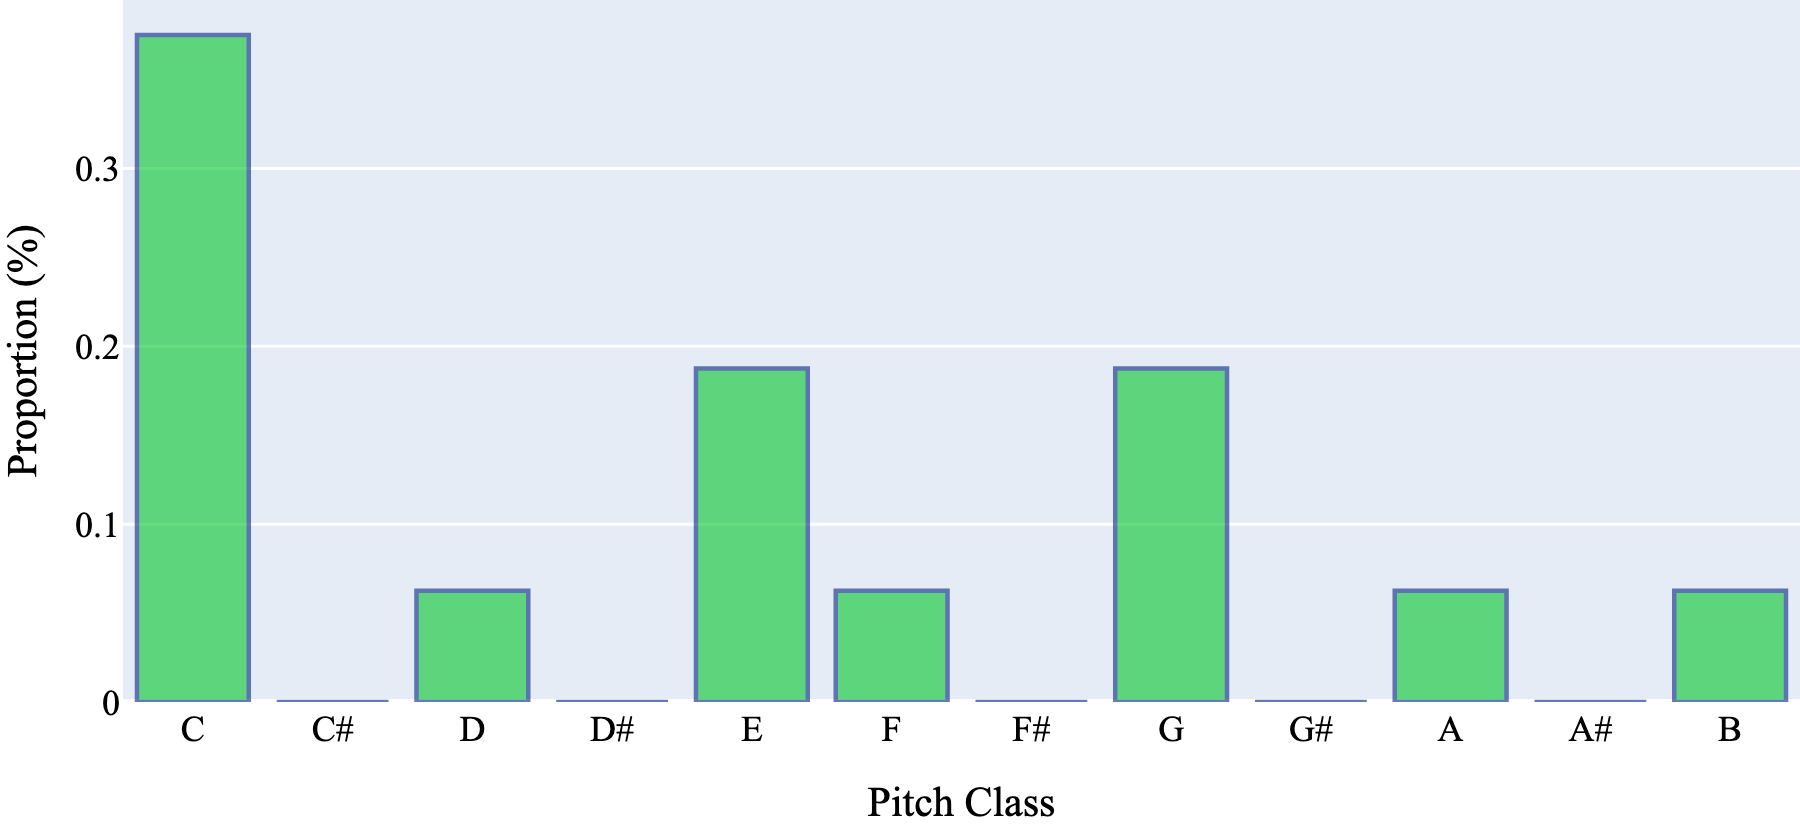

In [5]:
listOfPitchClasses = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
listOfDurationsMajor = [3/8, 0, 1/16, 0, 3/16, 1/16, 0, 3/16, 0, 1/16, 0, 1/16]

fig = go.Figure()
fig.add_trace(go.Bar(x =listOfPitchClasses, y =listOfDurationsMajor, marker_color='rgb(3,199,45)', marker_line_color='rgb(3,35,134)', marker_line_width=1.5, opacity=0.6, name='Major'))
fig.update_layout(xaxis=(dict(title={'text': 'Pitch Class'})))
fig.update_layout(yaxis=(dict(title={'text': 'Proportion (%)'})))
fig.update_layout(font=dict(family="Times New Roman, monospace", size=12, color='rgb(0,0,0)'))
fig.update_layout(margin={'l': 0, 'r': 0, 't': 0, 'b': 0})
img_bytes = fig.to_image(format="png", width=600, height=275, scale=3)
Image(img_bytes)

In [20]:
data2 = pd.read_csv('/Users/joshua ballance/Desktop/pitchclassprofile.csv', index_col='Title')
revisedData = data2[['Op. 3 i']]
revisedData=revisedData.transpose().drop(columns=['Range', 'Duration']).transpose()
revisedData=revisedData.assign(Major_0 = listOfDurationsMajor0) 
revisedData=revisedData.assign(Major_1 = listOfDurationsMajor1)
revisedData=revisedData.assign(Major_2 = listOfDurationsMajor2) 
revisedData=revisedData.assign(Major_3 = listOfDurationsMajor3) 
revisedData=revisedData.assign(Major_4 = listOfDurationsMajor4) 
revisedData=revisedData.assign(Major_5 = listOfDurationsMajor5) 
revisedData=revisedData.assign(Major_6 = listOfDurationsMajor6) 
revisedData=revisedData.assign(Major_7 = listOfDurationsMajor7) 
revisedData=revisedData.assign(Major_8 = listOfDurationsMajor8) 
revisedData=revisedData.assign(Major_9 = listOfDurationsMajor9) 
revisedData=revisedData.assign(Major_10 = listOfDurationsMajor10) 
revisedData=revisedData.assign(Major_11 = listOfDurationsMajor11) 
revisedData=revisedData.assign(Minor_0 = listOfDurationsMinor0) 
revisedData=revisedData.assign(Minor_1 = listOfDurationsMinor1)
revisedData=revisedData.assign(Minor_2 = listOfDurationsMinor2)
revisedData=revisedData.assign(Minor_3 = listOfDurationsMinor3)
revisedData=revisedData.assign(Minor_4 = listOfDurationsMinor4)
revisedData=revisedData.assign(Minor_5 = listOfDurationsMinor5)
revisedData=revisedData.assign(Minor_6 = listOfDurationsMinor6)
revisedData=revisedData.assign(Minor_7 = listOfDurationsMinor7)
revisedData=revisedData.assign(Minor_8 = listOfDurationsMinor8)
revisedData=revisedData.assign(Minor_9 = listOfDurationsMinor9)
revisedData=revisedData.assign(Minor_10 = listOfDurationsMinor10)
revisedData=revisedData.assign(Minor_11 = listOfDurationsMinor11)


corr = revisedData.corr(method="spearman")
corr

,Op. 3 i,Major_0,Major_1,Major_2,Major_3,Major_4,Major_5,Major_6,Major_7,Major_8,...,Minor_2,Minor_3,Minor_4,Minor_5,Minor_6,Minor_7,Minor_8,Minor_9,Minor_10,Minor_11
Op. 3 i,1.000000,-0.224563,0.108773,0.228072,0.059649,0.364915,-0.498249,-0.456143,-0.456143,0.182457,...,0.013986,-0.419580,0.496503,-0.125874,-0.041958,-0.013986,-0.300699,0.321678,-0.048951,0.090909
Major_0,-0.224563,1.000000,-0.420775,0.114437,-0.269366,-0.149648,0.392606,0.392606,0.392606,-0.149648,...,-0.382458,0.575442,-0.466670,0.308774,-0.477196,0.238598,0.445617,-0.543863,0.414038,-0.540354
Major_1,0.108773,-0.420775,1.000000,-0.420775,0.114437,-0.269366,-0.149648,-0.334507,-0.334507,0.392606,...,-0.038597,-0.382458,0.575442,-0.466670,0.308774,-0.477196,0.238598,0.445617,-0.543863,0.414038
Major_2,0.228072,0.114437,-0.420775,1.000000,-0.420775,0.114437,-0.269366,0.392606,0.392606,-0.334507,...,0.466670,-0.038597,-0.382458,0.575442,-0.466670,0.308774,-0.477196,0.238598,0.445617,-0.543863
Major_3,0.059649,-0.269366,0.114437,-0.420775,1.000000,-0.420775,0.114437,-0.149648,-0.149648,0.392606,...,-0.540354,0.466670,-0.038597,-0.382458,0.575442,-0.466670,0.308774,-0.477196,0.238598,0.445617
Major_4,0.364915,-0.149648,-0.269366,0.114437,-0.420775,1.000000,-0.420775,-0.269366,-0.269366,-0.149648,...,0.414038,-0.540354,0.466670,-0.038597,-0.382458,0.575442,-0.466670,0.308774,-0.477196,0.238598
Major_5,-0.498249,0.392606,-0.149648,-0.269366,0.114437,-0.420775,1.000000,0.114437,0.114437,-0.269366,...,-0.543863,0.414038,-0.540354,0.466670,-0.038597,-0.382458,0.575442,-0.466670,0.308774,-0.477196
Major_6,-0.456143,0.392606,-0.334507,0.392606,-0.149648,-0.269366,0.114437,1.000000,1.000000,-0.420775,...,0.238598,0.445617,-0.543863,0.414038,-0.540354,0.466670,-0.038597,-0.382458,0.575442,-0.466670
Major_7,-0.456143,0.392606,-0.334507,0.392606,-0.149648,-0.269366,0.114437,1.000000,1.000000,-0.420775,...,0.238598,0.445617,-0.543863,0.414038,-0.540354,0.466670,-0.038597,-0.382458,0.575442,-0.466670
Major_8,0.182457,-0.149648,0.392606,-0.334507,0.392606,-0.149648,-0.269366,-0.420775,-0.420775,1.000000,...,-0.477196,0.238598,0.445617,-0.543863,0.414038,-0.540354,0.466670,-0.038597,-0.382458,0.575442


In [10]:
listOfDurationsMajor0 = [23.8, 0.6, 11.1, 0.6, 13.7, 9.4, 1.6, 21.4, 0.9, 0.8, 0.8, 8.1]#for a C tonic
listOfDurationsMajor1 = [0.6, 11.1, 0.6, 13.7, 9.4, 1.6, 21.4, 0.9, 0.8, 0.8, 8.1,23.8]#for a B tonic
listOfDurationsMajor2 = [11.1, 0.6, 13.7, 9.4, 1.6, 21.4, 0.9, 0.8, 0.8, 8.1,23.8, 0.6]#for a Bb tonic
listOfDurationsMajor3 = [0.6, 13.7, 9.4, 1.6, 21.4, 0.9, 0.8, 0.8, 8.1,23.8, 0.6, 11.1]
listOfDurationsMajor4 = [13.7, 9.4, 1.6, 21.4, 0.9, 0.8, 0.8, 8.1,23.8, 0.6, 11.1, 0.6]
listOfDurationsMajor5 = [9.4, 1.6, 21.4, 0.9, 0.8, 0.8, 8.1,23.8, 0.6, 11.1, 0.6, 13.7]
listOfDurationsMajor6 = [21.4, 0.9, 0.8, 0.8, 8.1,23.8, 0.6, 11.1, 0.6, 13.7, 9.4, 1.6]
listOfDurationsMajor7 = [21.4, 0.9, 0.8, 0.8, 8.1,23.8, 0.6, 11.1, 0.6, 13.7, 9.4, 1.6]
listOfDurationsMajor8 = [0.9, 0.8, 0.8, 8.1,23.8, 0.6, 11.1, 0.6, 13.7, 9.4, 1.6, 21.4]
listOfDurationsMajor9 = [0.8, 0.8, 8.1,23.8, 0.6, 11.1, 0.6, 13.7, 9.4, 1.6, 21.4, 0.9]
listOfDurationsMajor10 = [0.8, 8.1,23.8, 0.6, 11.1, 0.6, 13.7, 9.4, 1.6, 21.4, 0.9, 0.8]
listOfDurationsMajor11 = [8.1,23.8, 0.6, 11.1, 0.6, 13.7, 9.4, 1.6, 21.4, 0.9, 0.8, 0.8]
listOfDurationsMinor0 = [22, 0.6, 10.4, 12.3, 1.9, 10.3, 1.2, 21.4, 6.2, 2.2, 6.1, 5.2]
listOfDurationsMinor1 = [0.6, 10.4, 12.3, 1.9, 10.3, 1.2, 21.4, 6.2, 2.2, 6.1, 5.2,22]
listOfDurationsMinor2 = [10.4, 12.3, 1.9, 10.3, 1.2, 21.4, 6.2, 2.2, 6.1, 5.2,22, 0.6]
listOfDurationsMinor3 = [12.3, 1.9, 10.3, 1.2, 21.4, 6.2, 2.2, 6.1, 5.2,22, 0.6, 10.4]
listOfDurationsMinor4 = [1.9, 10.3, 1.2, 21.4, 6.2, 2.2, 6.1, 5.2,22, 0.6, 10.4, 12.3]
listOfDurationsMinor5 = [10.3, 1.2, 21.4, 6.2, 2.2, 6.1, 5.2,22, 0.6, 10.4, 12.3, 1.9]
listOfDurationsMinor6 = [1.2, 21.4, 6.2, 2.2, 6.1, 5.2,22, 0.6, 10.4, 12.3, 1.9, 10.3]
listOfDurationsMinor7 = [ 21.4, 6.2, 2.2, 6.1, 5.2,22, 0.6, 10.4, 12.3, 1.9, 10.3, 1.2]
listOfDurationsMinor8 = [6.2, 2.2, 6.1, 5.2,22, 0.6, 10.4, 12.3, 1.9, 10.3, 1.2, 21.4]
listOfDurationsMinor9 = [ 2.2, 6.1, 5.2,22, 0.6, 10.4, 12.3, 1.9, 10.3, 1.2, 21.4, 6.2]
listOfDurationsMinor10 = [6.1, 5.2,22, 0.6, 10.4, 12.3, 1.9, 10.3, 1.2, 21.4, 6.2, 2.2]
listOfDurationsMinor11 = [5.2,22, 0.6, 10.4, 12.3, 1.9, 10.3, 1.2, 21.4, 6.2, 2.2, 6.1]
